<a href="https://colab.research.google.com/github/Manolo1109/Examen1_AnalisisCuantitativo/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
import pandas as pd
import numpy as np #Librería para manejar arreglos y vectores
import matplotlib.pyplot as plt #Librería para generación de gráficos
import seaborn as sns
import statsmodels.api as sms
import scipy.stats as stats
import pylab
from statsmodels.stats.diagnostic import het_breuschpagan
import math
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def limpiar_ceros(frame):
  for col in frame.columns:
    frame[col] = frame[col].apply(lambda x: np.NaN if x <= 0 else x)
  return frame

def eliminar_nan(frame):
  return frame.dropna()

def calcular_ln(frame):
  for col in frame.columns:
    frame[col] = frame[col].apply(lambda x: math.log(x))
  return frame

#PUNTO 1
Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.




In [4]:
df = pd.read_excel('/content/Examen_AC/data_exam1.xlsx', sheet_name = "data1")
df.head()

Y          X  Ind
0  66.199147  12.653765    0
1  44.311301   8.204418    0
2  48.390783   8.768596    0
3  58.087413  16.169568    1
4  60.708671   9.980310    0

##Punto1.1

Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

In [5]:
df.describe()

Y            X        Ind
count  1000.000000  1000.000000  1000.0000
mean     46.953751     9.976858     0.2000
std      22.046143     3.762567     0.4002
min     -34.894319    -4.263757     0.0000
25%      32.427643     7.638899     0.0000
50%      45.460252     9.952888     0.0000
75%      61.587567    12.379984     0.0000
max     135.542574    25.628678     1.0000

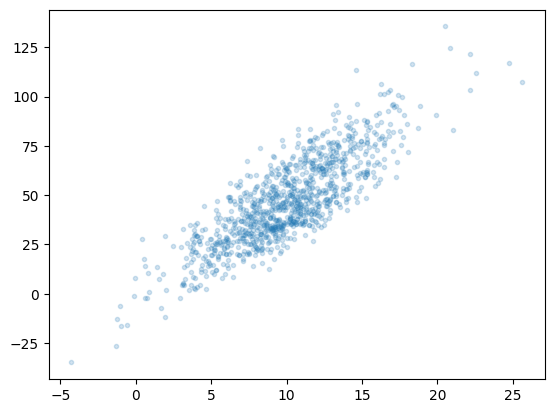

In [6]:
plt.plot(df["X"], df["Y"], ".", alpha=0.2)

In [7]:
df.corr()

Y         X       Ind
Y    1.000000  0.832057 -0.237224
X    0.832057  1.000000  0.024069
Ind -0.237224  0.024069  1.000000

In [8]:
x = df.drop("Y", axis=1)
X =  sms.add_constant(x)
y = df["Y"]

In [9]:
model = sms.OLS(y, X) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          2.25e-308
Time:                        00:27:26   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.424      -1.143       2.718
X              4.9116      0.091     53.848      0.000       4.733       5.091
Ind          -14.1796      0.858    -16.535      0.000     -15.862     -12.497
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.440
Skew:                           0.078   Prob(JB):                        0.295
Kurtosis:                       3.185   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
residuales = result.resid
residuales

0       3.261586
1       3.227152
2       4.535621
3      -7.938790
4      10.902053
         ...    
995    20.154935
996     5.208588
997   -20.049836
998    14.847336
999     2.314925
Length: 1000, dtype: float64

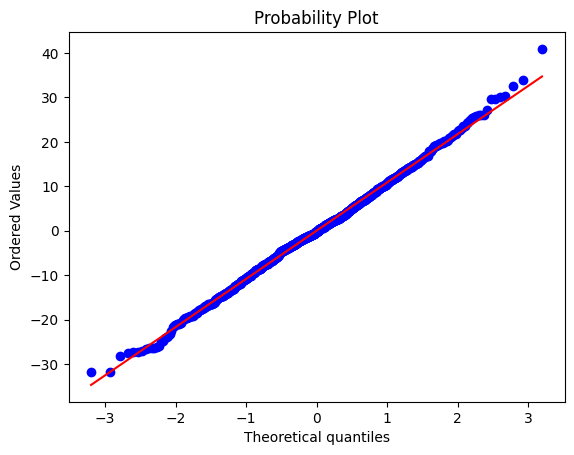

In [11]:
stats.probplot(residuales, dist="norm", plot=pylab)
pylab.show()

In [12]:
het_breuschpagan(result.resid, result.model.exog)

(64.60486660135223,
 9.359043491930456e-15,
 34.42986268675474,
 3.4758447737327506e-15)

El modelo de regresión lineal con variable categórica es el siguiente

Se observa que si es un modelo lineal significativo (p value F-statistic<0.05)
Además se observa que los betas para las dos variables independientes son significativos (p-value <0.005)

y = 0.7873 + 4.9116*X -14.1796*Ind

El modelo cumple el supuesto de errores independientes, es decir, no hay correlacion entre los errores del modelo, por lo tanto son independientes (Durbin-Watson = 1.997)

En el modelo, también se observa que los errores distribuyen normal con media cero y varianza constante (p-value Jarque-Bera = 0.299)

Se observa que respecto al supuesto de homocedasticidad de los errores, el modelo no cumple, es decir, tiene una varianza no constante (p-value breuchpagan < 0.05).

##Punto 1.2
Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto

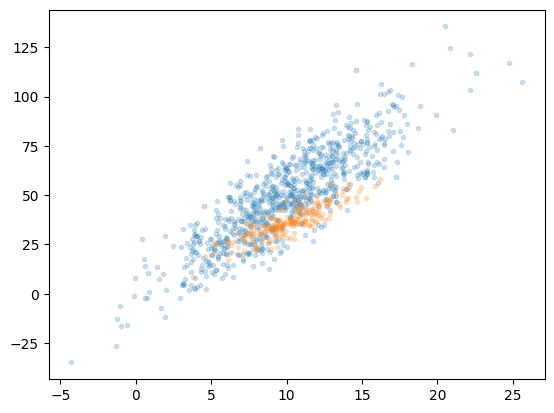

In [13]:
df_cero = df.query('Ind == 0')
df_uno = df.query('Ind == 1')

plt.plot(df_cero["X"], df_cero["Y"], ".", alpha=0.2)
plt.plot(df_uno["X"], df_uno["Y"], ".", alpha=0.2)

In [14]:
cov_XY_cero = np.cov(df_cero["X"], df_cero["Y"])[0, 1]
var_X_cero = np.var(df_cero["X"], ddof=1)

beta1_cero = cov_XY_cero/var_X_cero

beta1_cero

5.041128533994832

In [15]:
cov_XY_uno = np.cov(df_uno["X"], df_uno["Y"])[0, 1]
var_X_uno = np.var(df_uno["X"], ddof=1)

beta1_uno = cov_XY_uno/var_X_uno

beta1_uno

3.1944885147919866

De acuerdo al gráfico de dispersión de la muestra discriminando las categorias de Ind, se observa un cambio en la tasa media de Y condicionado los incrementos de X, además al calcular la pendiente de cada categoría se corrobora lo anterior: beta1_cero = 5.04 y beta1_uno = 3.19

#PUNTO 2

Considere el conjunto de datos “data2” del fichero data_exam1.xlsx



In [16]:
df_punto2 = pd.read_excel('/content/Examen_AC/data_exam1.xlsx', sheet_name = "data2")
df_punto2.head()

Y         X
0  12.189142  0.226957
1  12.187456  0.088938
2  11.782692  0.199069
3   5.732032  0.003812
4   7.026970  0.004573

##Punto 2.1

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bivariante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

In [17]:
df_punto2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [18]:
df_punto2.describe()

Y             X
count  1000.000000  1.000000e+03
mean      9.445622  7.234805e-02
std       3.908189  9.753985e-02
min     -12.073239  1.343729e-08
25%       7.411486  8.450417e-03
50%      10.072134  3.655172e-02
75%      12.082546  9.992523e-02
max      17.838788  9.397465e-01

(array([733., 171.,  52.,  24.,  11.,   6.,   0.,   0.,   2.,   1.]),
 array([1.34372911e-08, 9.39746626e-02, 1.87949312e-01, 2.81923961e-01,
        3.75898610e-01, 4.69873259e-01, 5.63847908e-01, 6.57822558e-01,
        7.51797207e-01, 8.45771856e-01, 9.39746505e-01]),
 <BarContainer object of 10 artists>)

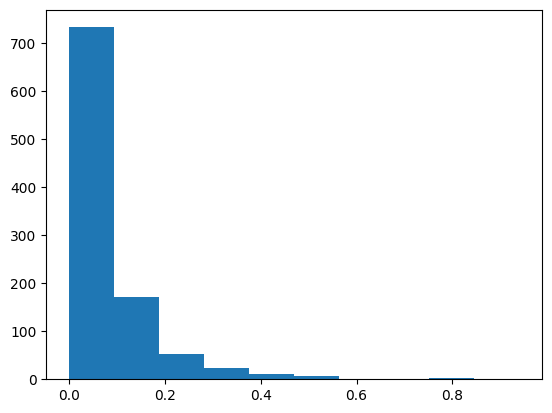

In [19]:
plt.hist(df_punto2["X"])

(array([  3.,   1.,   8.,  10.,  42.,  80., 227., 351., 233.,  45.]),
 array([-12.07323856,  -9.08203587,  -6.09083318,  -3.09963048,
         -0.10842779,   2.8827749 ,   5.8739776 ,   8.86518029,
         11.85638298,  14.84758567,  17.83878837]),
 <BarContainer object of 10 artists>)

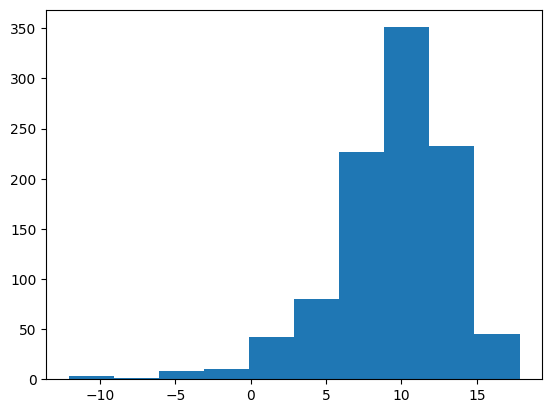

In [20]:
plt.hist(df_punto2["Y"])

In [21]:
df_punto2.kurt()

Y     2.452048
X    13.904612
dtype: float64

In [22]:
df_punto2.skew()

Y   -1.103681
X    2.952165
dtype: float64

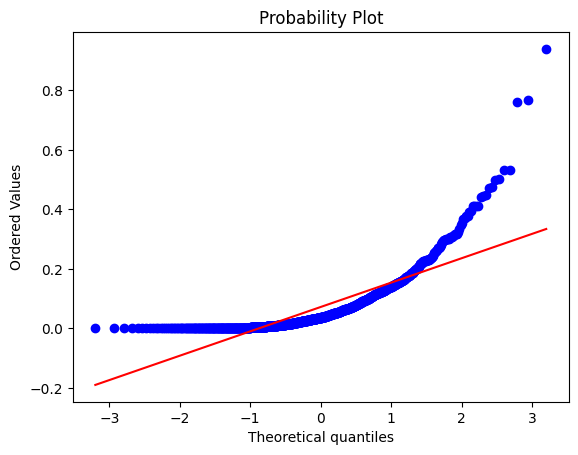

In [23]:
stats.probplot(df_punto2["X"], dist="norm", plot=pylab)
pylab.show()

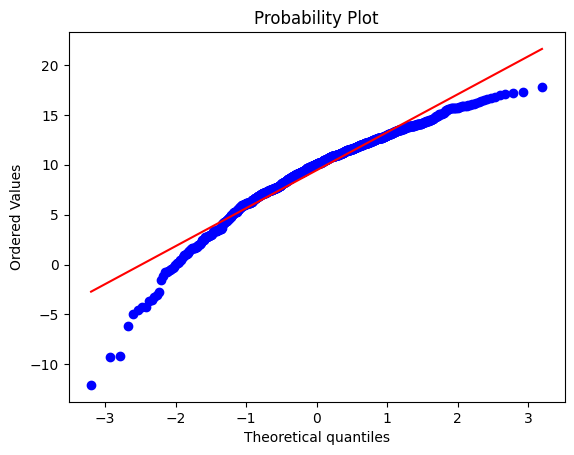

In [24]:
stats.probplot(df_punto2["Y"], dist="norm", plot=pylab)
pylab.show()

In [25]:
res_shapiro_x = stats.shapiro(df_punto2["X"])
res_shapiro_x

ShapiroResult(statistic=0.7050634026527405, pvalue=1.3154746787086258e-38)

In [26]:
res_shapiro_y = stats.shapiro(df_punto2["Y"])
res_shapiro_y

ShapiroResult(statistic=0.9445497989654541, pvalue=6.687931028371396e-19)

Para la variable X:
-De acuerdo con lo observado en el histograma se observa que la distribución es asimetrica hacía la derecha, lo cuál también se corrobora con el coeficiente de asimetría de 2.952165, adicionalmente se observa que es leptocurtica por su coeficiente de curtosis cuyo valor es 13.904612.

Para la variable Y:
-De acuerdo con lo observado en el histograma se observa que la distribución es asimetrica hacía la izquierda lo cuál también se corrobora con el coeficiente de asimetría de -1.103681, adicionalmente se observa que es mesocurtica por su coeficiente de curtosis cuyo valor es 2.452048.

Por medio del estadistico Shapiro Wilks se corrobora que ni la variable X ni la variable Y siguen una distribución normal (los p-value para ambos casos son menores a un nivel de significancia de 0.05)

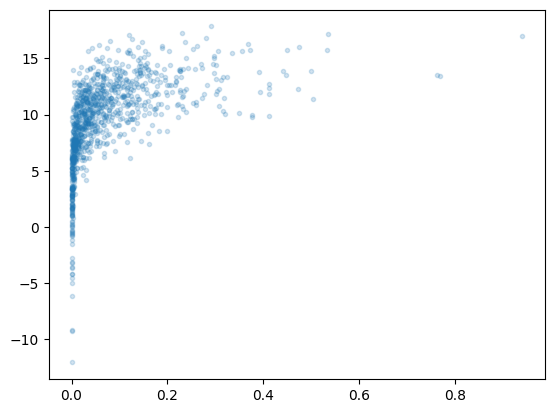

In [27]:
plt.plot(df_punto2["X"], df_punto2["Y"], ".", alpha=0.2)

In [28]:
df_punto2.corr("pearson")

Y         X
Y  1.000000  0.520376
X  0.520376  1.000000

In [29]:
df_punto2.corr("spearman")

Y         X
Y  1.000000  0.767833
X  0.767833  1.000000

In [30]:
df_punto2.corr("kendall")

Y         X
Y  1.000000  0.580777
X  0.580777  1.000000

De acuerdo con el gráfico de dispersión se puede concluir que las variables X y Y no se relacionan linealmente, lo que se corrobora con el coeficiente de correlación de person, sin embargo al realizar la corelación con spearman se observa que si hay una correlación pero no del tipo lineal.

##Punto 2.2
De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior,  proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modelo

In [31]:
#Dado que la grafica tiene un comportamiento logaritmico se procede a realizar una estimación logarítmica para la variable x
df_copy = df_punto2.copy()

df_copy["X"] = df_copy["X"].apply(lambda x: math.log(x))

In [32]:
df_punto2

Y         X
0    12.189142  0.226957
1    12.187456  0.088938
2    11.782692  0.199069
3     5.732032  0.003812
4     7.026970  0.004573
..         ...       ...
995  10.283153  0.053585
996  -5.006186  0.000002
997  13.845597  0.073044
998  14.012956  0.085079
999  11.521064  0.108597

[1000 rows x 2 columns]

In [33]:
df_copy

Y          X
0    12.189142  -1.482996
1    12.187456  -2.419815
2    11.782692  -1.614106
3     5.732032  -5.569607
4     7.026970  -5.387539
..         ...        ...
995  10.283153  -2.926485
996  -5.006186 -13.092279
997  13.845597  -2.616688
998  14.012956  -2.464177
999  11.521064  -2.220112

[1000 rows x 2 columns]

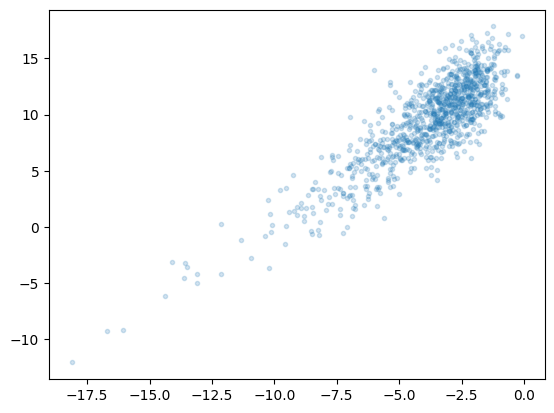

In [34]:
plt.plot(df_copy["X"], df_copy["Y"], ".", alpha=0.2)

In [35]:
df_copy.corr()

Y         X
Y  1.000000  0.855568
X  0.855568  1.000000

Se observó que las variables tenían una relación exponencial, por lo tanto se aplica la función logaritmo tanto a X como a Y. Es menester resaltar que la función logaritmo con valores menores o iguales a 0 genera error, por lo que se decidió sacar los valores menores o iguales a cero del dataset teniendo en cuanta que al sacar estos valores no se distorsiona la tendencia exponencial.

In [36]:
y_punto2 = df_copy["Y"]
x_punto2 = df_copy["X"]

X_punto2 =  sms.add_constant(x_punto2)

model_punto2 = sms.OLS(y_punto2, X_punto2) #Ordinary List Square, Creando el modelo de regresión lineal simple (OLS)

result_punto2 = model_punto2.fit()

result_punto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2726.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.29e-287
Time:                        00:27:29   Log-Likelihood:                -2123.1
No. Observations:                1000   AIC:                             4250.
Df Residuals:                     998   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1706      0.127    119.481      0.000      14.921      15.420
X              1.4987      0.029     52.209      0.000       1.442       1.555
==============================================================================
Omnibus:                        0.330   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.305
Skew:                           0.043   Prob(JB):                        0.858
Kurtosis:                       3.005   Cond. No.                         9.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

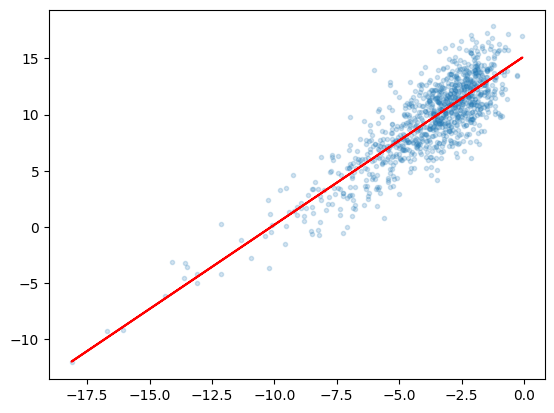

In [37]:
y_pred = result_punto2.predict()
plt.plot(df_copy["X"], df_copy["Y"], ".", alpha=0.2)
plt.plot(df_copy["X"], y_pred, label='Modelo OLS', color='red')

In [38]:
het_breuschpagan(result_punto2.resid, result_punto2.model.exog)

(0.5282662931659354,
 0.46733665913366673,
 0.5274884149292246,
 0.46783499688166175)

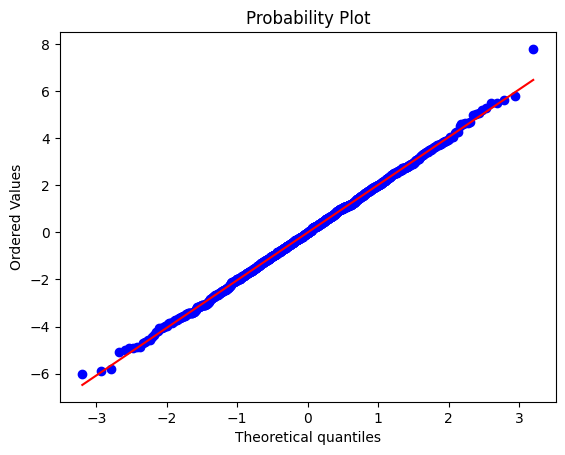

In [39]:
stats.probplot(result_punto2.resid, dist="norm", plot=pylab)
pylab.show()

El modelo de regresión lineal es el siguiente

Se observa que si es un modelo lineal significativo (p value F-statistic<0.05)
Además se observa que el beta para laa  variablee independientee soesn significativo (p-value <0.005)

y = 15.1706 + 1.4987*X

El modelo cumple el supuesto de errores independientes, es decir, no hay correlacion entre los errores del modelo, por lo tanto son independientes (Durbin-Watson = 1.982)

En el modelo se observa que los errores  distribuyen normal con media cero y varianza constante (p-value Jarque-Bera > 0.05)

Se observa que respecto al supuesto de homocedasticidad de los errores, el modelo  cumple, es decir, tiene una varianza constante (p-value breuchpagan > 0.05).

El coeficiente de determinación es bueno. Indicando que se puede explicar aproximadamente el 70% de la variabilidad de y en función de la variable x.

Como conclusión, se observa que el modelo es significativo y cumple los supuestos, es decir, es un buen modelo de regresión lineal para predecir y en función de x.

#PUNTO 3

Considere el conjunto de datos “Wine Quality” del fichero datos.xls. Defina como variable respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.



In [40]:
df_punto3 = pd.read_excel('/content/Examen_AC/datos.xls', sheet_name = "Wine Quality", header=2)
df_punto3.head()

Calidad del Vino  Acidez Fija  Acidez Volátil  Ácido Cítrico  \
0                 6          7.0            0.27           0.36   
1                 6          6.3            0.30           0.34   
2                 6          8.1            0.28           0.40   
3                 6          7.2            0.23           0.32   
4                 6          7.2            0.23           0.32   

   Azúcar Residual  Cloruros  Dióxido de Azúfre Libre  \
0             20.7     0.045                     45.0   
1              1.6     0.049                     14.0   
2              6.9     0.050                     30.0   
3              8.5     0.058                     47.0   
4              8.5     0.058                     47.0   

   Dióxido de Azúfre Total  Densidad    pH  Sulfatos  Alcohol  
0                    170.0    1.0010  3.00      0.45      8.8  
1                    132.0    0.9940  3.30      0.49      9.5  
2                     97.0    0.9951  3.26      0.44     10.1  
3                    186.0    0.9956  3.19      0.40      9.9  
4                    186.0    0.9956  3.19      0.40      9.9

In [41]:
df_punto3.shape

(4898, 12)

##Punto 3.1

Estandarice las variables, calcule las matrices de correlación de Pearson y compárelas ¿Qué diferencia encuentra entre las estructuras de dependencias obtenidas?

In [42]:
df_punto3 = df_punto3.drop(["pH", "Sulfatos", "Cloruros", "Acidez Volátil", "Acidez Fija", "Calidad del Vino"], axis=1)
df_punto3.head()

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0           0.36             20.7                     45.0   
1           0.34              1.6                     14.0   
2           0.40              6.9                     30.0   
3           0.32              8.5                     47.0   
4           0.32              8.5                     47.0   

   Dióxido de Azúfre Total  Densidad  Alcohol  
0                    170.0    1.0010      8.8  
1                    132.0    0.9940      9.5  
2                     97.0    0.9951     10.1  
3                    186.0    0.9956      9.9  
4                    186.0    0.9956      9.9

In [43]:
df_punto3_estandarizado = stats.zscore(df_punto3, axis=1)
df_punto3_estandarizado

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0         -0.680780        -0.339861                 0.067432   
1         -0.548896        -0.522362                -0.261241   
2         -0.700932        -0.509762                 0.169626   
3         -0.630959        -0.507482                 0.073675   
4         -0.630959        -0.507482                 0.073675   
...             ...              ...                      ...   
4893      -0.657569        -0.617298                 0.071315   
4894      -0.669929        -0.542922                 0.271649   
4895      -0.637805        -0.612316                 0.114476   
4896      -0.611874        -0.591391                -0.107486   
4897      -0.631939        -0.619846                -0.009451   

      Dióxido de Azúfre Total  Densidad   Alcohol  
0                    2.162562 -0.670036 -0.539317  
1                    2.223625 -0.535124 -0.356003  
2                    2.140146 -0.683430 -0.415648  
3                    2.171876 -0.620761 -0.486349  
4                    2.171876 -0.620761 -0.486349  
...                       ...       ...       ...  
4893                 2.161746 -0.636015 -0.322178  
4894                 2.116901 -0.659375 -0.516324  
4895                 2.158579 -0.617552 -0.405382  
4896                 2.196822 -0.594241 -0.291831  
4897                 2.178759 -0.614392 -0.303131  

[4898 rows x 6 columns]

<Axes: >

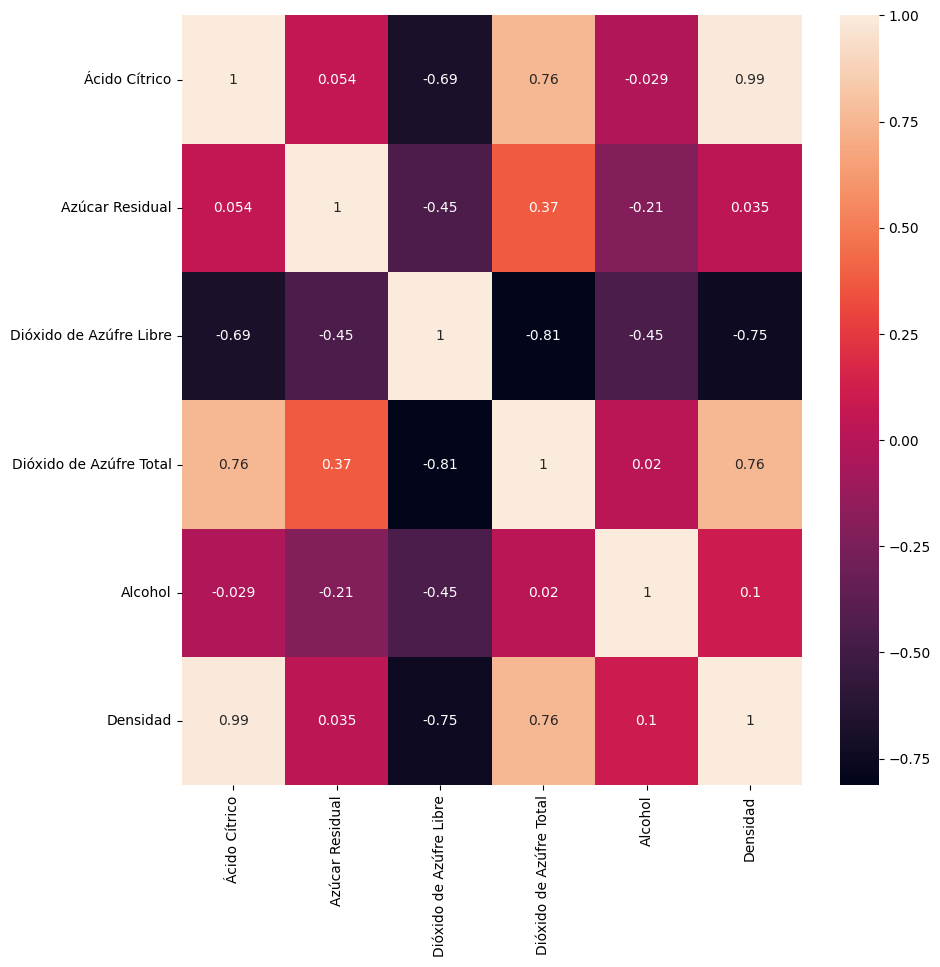

In [44]:
df_punto3_estandarizado_ordenado = df_punto3_estandarizado[["Ácido Cítrico", "Azúcar Residual", "Dióxido de Azúfre Libre", "Dióxido de Azúfre Total", "Alcohol", "Densidad"]]
df_punto3_estandarizado_ordenado

plt.figure(figsize = (10, 10))
sns.heatmap(df_punto3_estandarizado_ordenado.corr("pearson"), annot = True)

<Axes: >

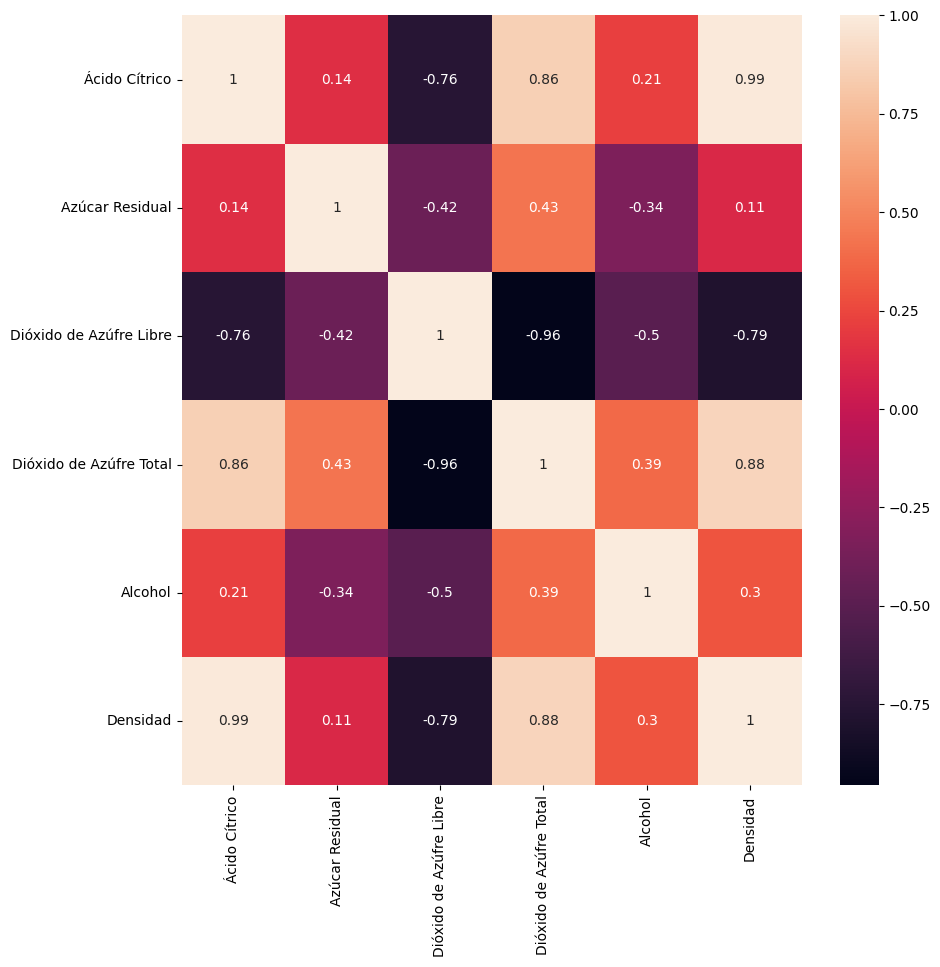

In [45]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_punto3_estandarizado_ordenado.corr("spearman"), annot = True)

<Axes: >

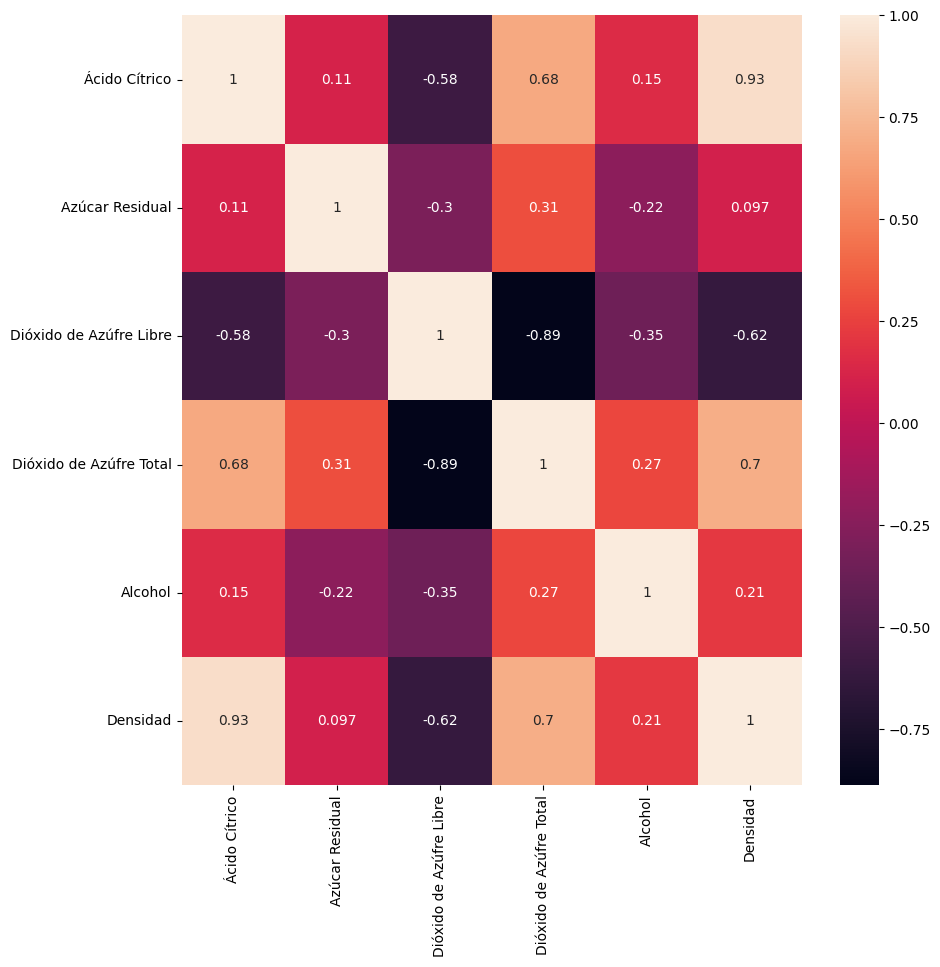

In [46]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_punto3_estandarizado_ordenado.corr("kendall"), annot = True)

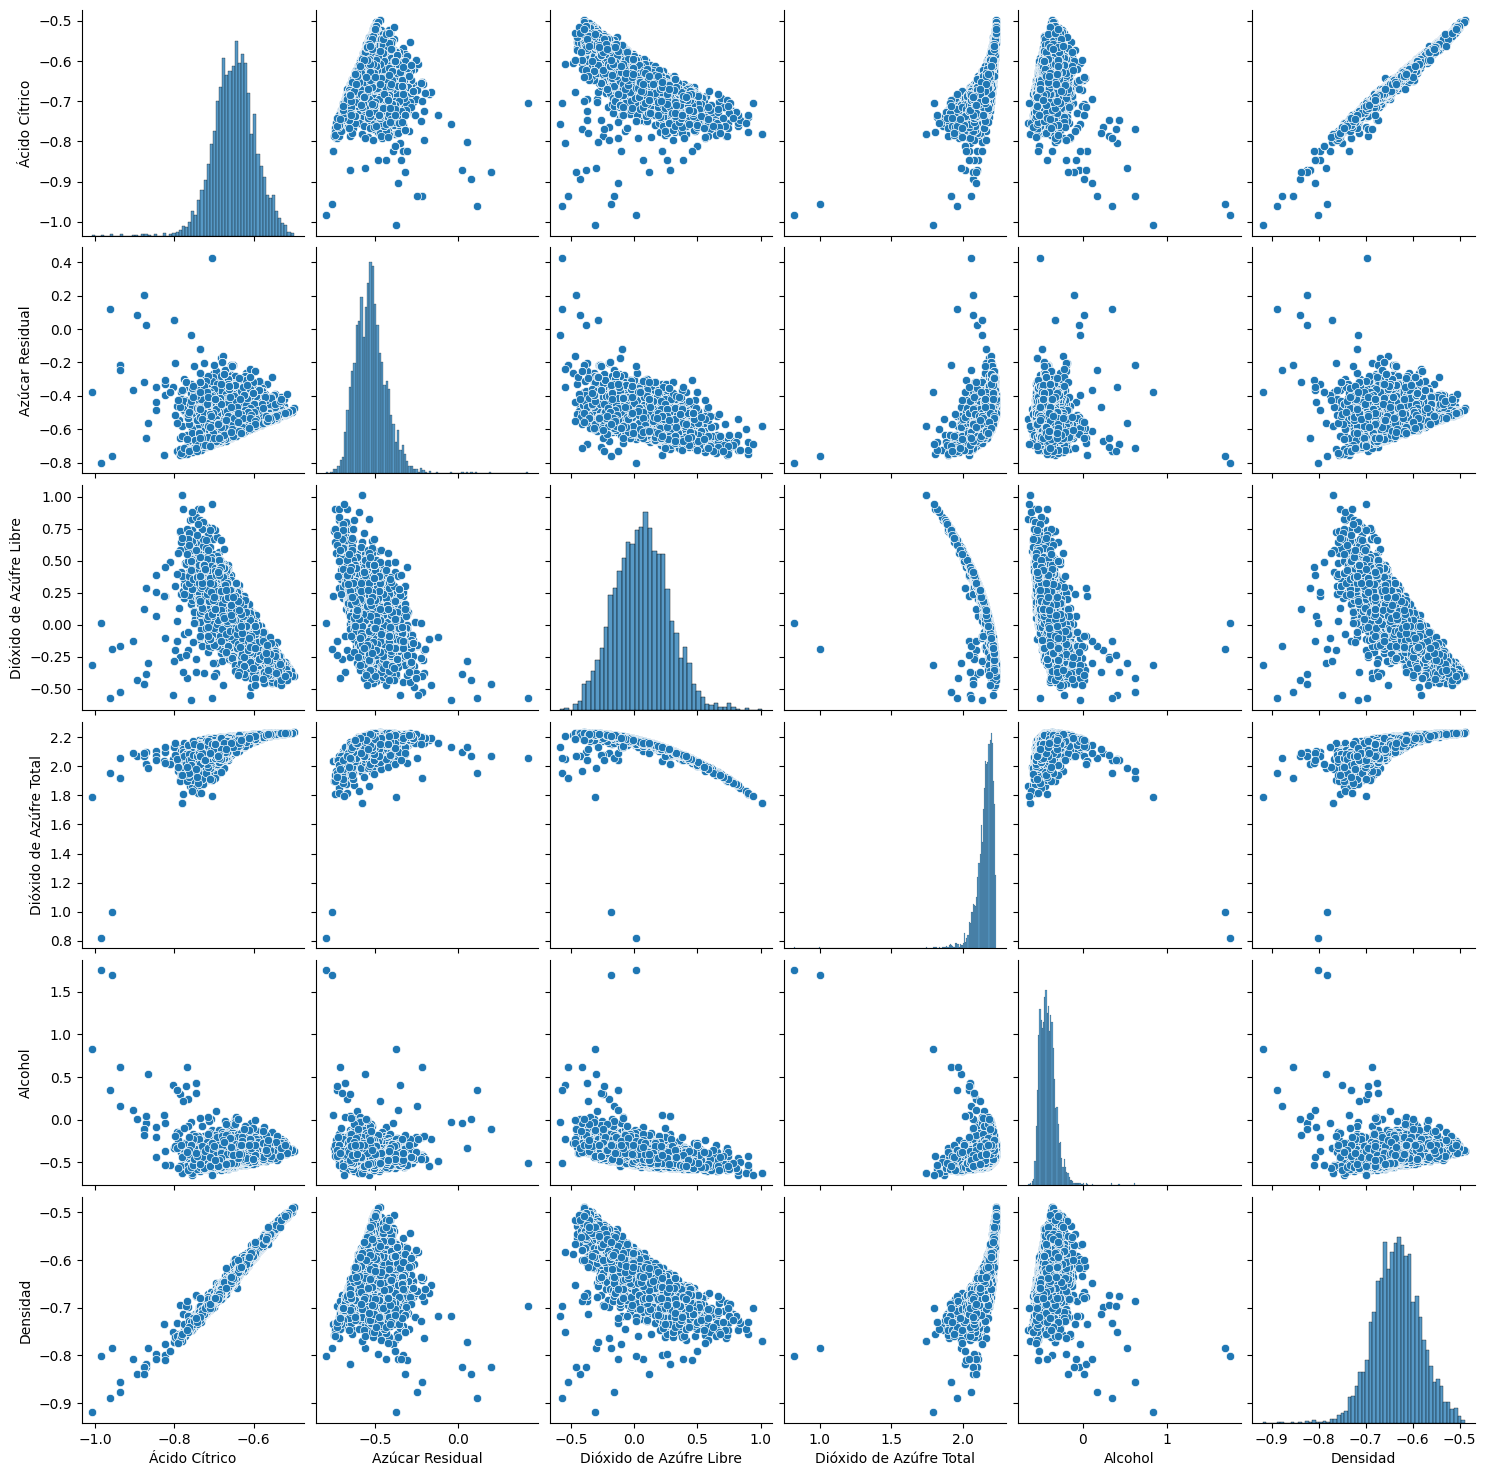

In [47]:
sns.pairplot(df_punto3_estandarizado_ordenado)

Se observa que la relación entre ácido cítrico y densidad estuvo bien estimada por pearson y sparman dado que es una relación lineal positiva, en cambio Kendall subestimo un poco esta relación.

Por otro lado, se observa que la relación entre dioxido de azufre total y dioxido de azufre libre no es lineal, pero si de la forma curvilinea inversa, spearman la estima muy bien, kendall subestima un poco respecto a spearman, pero también observa que hay un relación de algún tipo, mientras que pearson, para este caso, no estima de una manera tan precisa como kendall y spearman.

##Punto 3.2
Realice una partición de los datos tipo 80–20, donde el primer 80 % de los datos es
una muestra de entrenamiento y el restante 20 % una muestra de prueba/predicción.

In [48]:
y = df_punto3_estandarizado_ordenado["Densidad"]
X = df_punto3_estandarizado_ordenado.drop(['Densidad'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
XY = np.array([X_train["Ácido Cítrico"], X_train["Azúcar Residual"], X_train["Dióxido de Azúfre Libre"], X_train["Dióxido de Azúfre Total"], X_train["Alcohol"], y_train])
XY = pd.DataFrame(XY)
XY = XY.transpose()
XY

0         1         2         3         4         5
0    -0.741537 -0.541975  0.369287  2.074724 -0.435067 -0.725431
1    -0.632394 -0.471323  0.054035  2.175673 -0.501632 -0.624358
2    -0.694230 -0.480586  0.051257  2.166542 -0.368778 -0.674205
3    -0.675097 -0.637577  0.232332  2.122229 -0.384664 -0.657222
4    -0.652186 -0.346241 -0.067141  2.191843 -0.486199 -0.640076
...        ...       ...       ...       ...       ...       ...
3913 -0.636752 -0.498950 -0.003511  2.185640 -0.420602 -0.625825
3914 -0.702706 -0.530724  0.360885  2.084663 -0.522799 -0.689320
3915 -0.593561 -0.544105 -0.086459  2.201775 -0.392787 -0.584864
3916 -0.739905 -0.457552  0.369922  2.075405 -0.522824 -0.725047
3917 -0.687243 -0.650703  0.331830  2.091187 -0.415220 -0.669851

[3918 rows x 6 columns]

Luego, construya 3 modelos RLM con las matrices estimadas en el primer ítem

 $\hat\beta_{1,...,p} = \hat{ρ}_{XX}^{-1}\hat{ρ}_{Xy}$,   y   , $\hat\beta_{0} = \hat{\mu}_y - \hat{\mu}_X^T\hat\beta_{1,...,p}$

. Compare e interprete los valores de los co-
eficientes de regresión obtenidos por cada método.

In [50]:
S = np.cov(XY)
Spearson = np.array(XY.corr("pearson"))
Sspearman = np.array(XY.corr("spearman"))
Skendall = np.array(XY.corr("kendall"))

def calcular_betas_con_matriz_de_correlacion(tipo_correlacion):

    Sxx = tipo_correlacion[:5, :5] ## Note que las covarianzas de las variables explicativas son solo las que estan en las primeras 3 columas y las primeras 3 filas
    Sxy = tipo_correlacion[5, :5] ## Note que las covarianzas de cada variable explicativa con respecto a la respuesta estan guardadas en la ultima fila o ultima columna sin incluir el ultimo elemento que seria la varianza de Y

    betas = np.dot(np.linalg.inv(Sxx), Sxy)

    mu_y = np.mean(y) # Calculamos la media de y
    mu_xT = np.array([np.mean(X_train["Ácido Cítrico"]),
                      np.mean(X_train["Azúcar Residual"]),
                      np.mean(X_train["Dióxido de Azúfre Libre"]),
                      np.mean(X_train["Dióxido de Azúfre Total"]),
                      np.mean(X_train["Alcohol"])]) # Calculamos la media de X

    beta0 = [mu_y - np.dot(mu_xT, betas)] ## Calculamos el intercepto

    return beta0, betas

result_pearson = calcular_betas_con_matriz_de_correlacion(Spearson)
result_spearman = calcular_betas_con_matriz_de_correlacion(Sspearman)
result_kendall = calcular_betas_con_matriz_de_correlacion(Skendall)

B= pd.DataFrame([result_pearson[0] + list(result_pearson[1]), result_spearman[0] + list(result_spearman[1]), result_kendall[0] + list(result_kendall[1])])
B

0         1         2         3         4         5
0 -0.451970 -1.055232 -1.895956 -4.340280 -1.169651 -2.240802
1 -0.313810  0.858460 -0.080086 -0.078819  0.095555  0.015049
2 -0.334052  0.833421 -0.035354 -0.032781  0.111178  0.036933

Se observa que los b0 de Spearman y Kendall son similares, cercanos a -0.33 aproximadamente, mientras que el b0 para Pearson fue de -0.45. Para los valores de los betas1 de cada una de las variables independientes, también se observa similitud entre Spearman y Kendall, con grandes diferencias respecto a Pearson principalmente en el beta de la variable x1, x4 y x5 siendo en Pearson negativo, mientras que en Kendall y Spearman positivo.

##Punto 3.3

Realice una predicción con los datos de prueba de acuerdo a los modelos ajustados y calcule
el RMSE de la predicción ¿Cuál de los modelos lineales propuestos predice mejor?

In [51]:
y_estimado_pearson = B.at[0, 0] + B.at[0, 1] *X_test["Ácido Cítrico"] + B.at[0, 2]*X_test["Azúcar Residual"] + B.at[0, 3]*X_test["Dióxido de Azúfre Libre"] + B.at[0, 4]*X_test["Dióxido de Azúfre Total"] + B.at[0, 5]*X_test["Alcohol"]
y_estimado_spearman = B.at[1, 0] + B.at[1, 1] *X_test["Ácido Cítrico"] + B.at[1, 2]*X_test["Azúcar Residual"] + B.at[1, 3]*X_test["Dióxido de Azúfre Libre"] + B.at[1, 4]*X_test["Dióxido de Azúfre Total"] + B.at[1, 5]*X_test["Alcohol"]
y_estimado_kendall = B.at[2, 0] + B.at[2, 1] *X_test["Ácido Cítrico"] + B.at[2, 2]*X_test["Azúcar Residual"] + B.at[2, 3]*X_test["Dióxido de Azúfre Libre"] + B.at[2, 4]*X_test["Dióxido de Azúfre Total"] + B.at[2, 5]*X_test["Alcohol"]

In [52]:
y_estimado_pearson_train = B.at[0, 0] + B.at[0, 1] *X_train["Ácido Cítrico"] + B.at[0, 2]*X_train["Azúcar Residual"] + B.at[0, 3]*X_train["Dióxido de Azúfre Libre"] + B.at[0, 4]*X_train["Dióxido de Azúfre Total"] + B.at[0, 5]*X_train["Alcohol"]
y_estimado_spearman_train = B.at[1, 0] + B.at[1, 1] *X_train["Ácido Cítrico"] + B.at[1, 2]*X_train["Azúcar Residual"] + B.at[1, 3]*X_train["Dióxido de Azúfre Libre"] + B.at[1, 4]*X_train["Dióxido de Azúfre Total"] + B.at[1, 5]*X_train["Alcohol"]
y_estimado_kendall_train = B.at[2, 0] + B.at[2, 1] *X_train["Ácido Cítrico"] + B.at[2, 2]*X_train["Azúcar Residual"] + B.at[2, 3]*X_train["Dióxido de Azúfre Libre"] + B.at[2, 4]*X_train["Dióxido de Azúfre Total"] + B.at[2, 5]*X_train["Alcohol"]

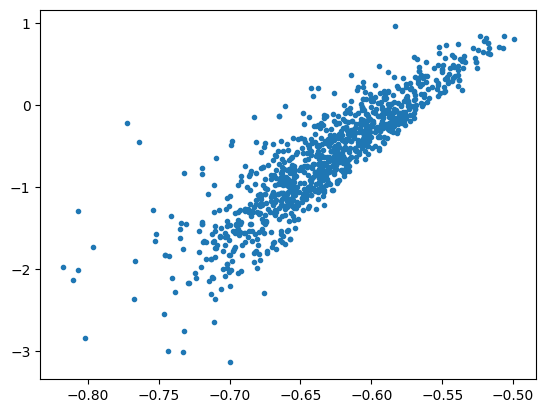

In [53]:
#Gráfico de dispersión variable explicativa (densidad) estandarizada de la muestra vs variable explicativa (densidad) estandarizada estimada con pearson
plt.plot(y_test, y_estimado_pearson, '.')

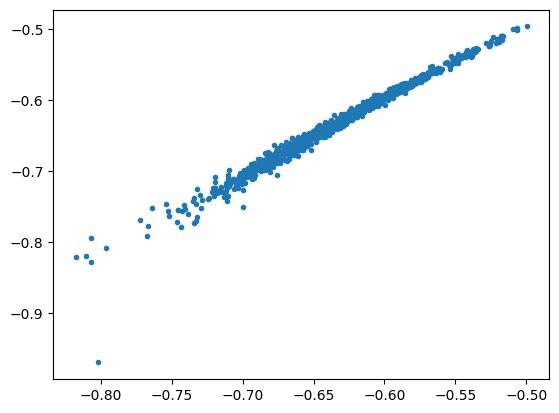

In [54]:
#Gráfico de dispersión variable explicativa (densidad) estandarizada de la muestra vs variable explicativa (densidad) estandarizada estimada con kendall
plt.plot(y_test, y_estimado_kendall, '.')

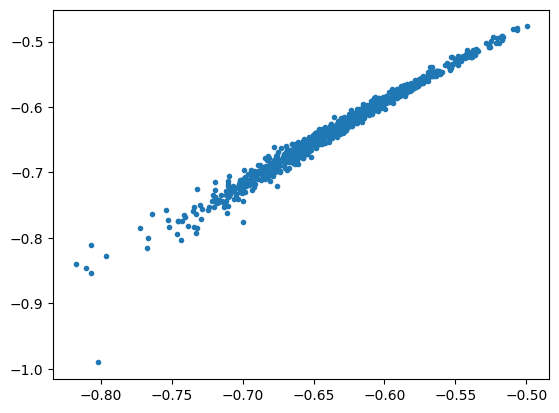

In [55]:
#Gráfico de dispersión variable explicativa (densidad) estandarizada de la muestra vs variable explicativa (densidad) estandarizada estimada con spearman
plt.plot(y_test, y_estimado_spearman, '.')

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_metrics(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test):
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    metrics = {"Training R^2": r2_train,
               "Test R^2": r2_test,
               "Training Adj R^2": adj_r2_train,
               "Test Adj R^2": adj_r2_test,
               "Training MAE": mean_absolute_error(y_train,y_pred_train),
               "Test MAE": mean_absolute_error(y_test,y_pred_test),
               "Training MAPE": mean_absolute_percentage_error(y_train,y_pred_train),
               "Test MAPE": mean_absolute_percentage_error(y_test,y_pred_test),
               "Training RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
               "Test RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test))
               }

    return metrics

def r2_metrics(X_train,X_test,y_train,y_test,y_pred_train,y_pred_test):
    k_train = X_train.shape[1]
    n_train = len(X_train)
    k_test = X_test.shape[1]
    n_test = len(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    adj_r2_train = 1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adj_r2_test = 1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    return r2_train, r2_test, adj_r2_train, adj_r2_test


In [57]:
regression_metrics(X_train,X_test,y_train,y_test,y_estimado_pearson_train,y_estimado_pearson)

{'Training R^2': -152.39150666244362,
 'Test R^2': -158.2175027312786,
 'Training Adj R^2': -152.58755920163387,
 'Test Adj R^2': -159.03484104098743,
 'Training MAE': 0.49282016660697286,
 'Test MAE': 0.5099435686168953,
 'Training MAPE': 0.7861812841843362,
 'Test MAPE': 0.8089936249436744,
 'Training RMSE': 0.6232278710676351,
 'Test RMSE': 0.6363517742163005}

In [58]:
regression_metrics(X_train,X_test,y_train,y_test,y_estimado_kendall_train,y_estimado_kendall)

{'Training R^2': 0.9770439157983385,
 'Test R^2': 0.9670933163077515,
 'Training Adj R^2': 0.9770145751999212,
 'Test Adj R^2': 0.9669243908267852,
 'Training MAE': 0.005240861097963812,
 'Test MAE': 0.005610180529995089,
 'Training MAPE': 0.008174264729301578,
 'Test MAPE': 0.00868713857205335,
 'Training RMSE': 0.007624214651031939,
 'Test RMSE': 0.009148374058048327}

In [59]:
regression_metrics(X_train,X_test,y_train,y_test,y_estimado_spearman_train,y_estimado_spearman)

{'Training R^2': 0.9160262920705083,
 'Test R^2': 0.9016546748115523,
 'Training Adj R^2': 0.9159189637117028,
 'Test Adj R^2': 0.9011498220128435,
 'Training MAE': 0.01108368492101903,
 'Test MAE': 0.011581899096044252,
 'Training MAPE': 0.017562253122504225,
 'Test MAPE': 0.018253171908231274,
 'Training RMSE': 0.014582026242142833,
 'Test RMSE': 0.015815346658774723}

Observando el RMSE de los tres modelos, se puede concuir que el modelo que mejor predice el comportamiento de las variables es el modelo calculado con la correlacion de Kendall, ya que es el mas bajo de los tres tanto para el set de entrenamiento como para el de prueba:

Training RMSE: 0.007624214651031939

Test RMSE: 0.009148374058048327

Recordemos que un RMSE más bajo indica un mejor ajuste del modelo a los datos y, por lo tanto, un mejor rendimiento predictivo


##Punto 3.5

Realice un análisis del diagrama de dispersión del conjunto de datos ¿Se evidencian comportamientos totalmente lineales? Si la respuesta es negativa, sugiera y realice transformaciones
de variables (Ejemplo: exp(Xi),  √Xi  , log(Xi), X2 i , 1Xi , etc.) y justifique el por qué de esa
transformación. Finalmente, genere un modelo RLM e interprételo detalladamente.

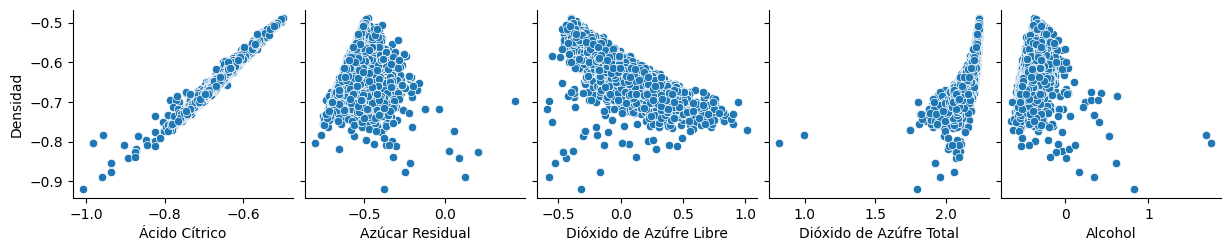

In [60]:
sns.pairplot(df_punto3_estandarizado_ordenado, x_vars=["Ácido Cítrico", "Azúcar Residual", "Dióxido de Azúfre Libre", "Dióxido de Azúfre Total", "Alcohol"], y_vars=["Densidad"], kind='scatter')
plt.show()

Solo se evidencia un comportamiento lineal, y salvo el Dióxido de Azúfre total, las demas variables no dan indicio de un comportamiento que siga una función matemática, por lo tanto se intentara aplicar transformaciones matemáticas solo al Dióxido de Azufre Total iniciando por una transformación exponencial.

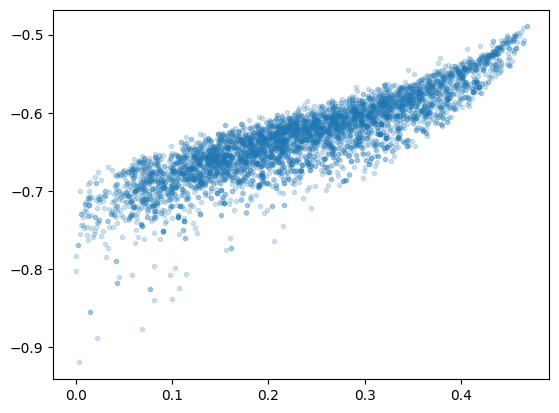

In [61]:
df_copy_punto3 = df_punto3_estandarizado_ordenado.copy()
df_copy_punto3['Dióxido de Azúfre Total'] = df_copy_punto3['Dióxido de Azúfre Total'].apply(lambda x: math.exp(11*x)/100000000000)
plt.plot(df_copy_punto3["Dióxido de Azúfre Total"], df_copy_punto3["Densidad"], ".", alpha=0.2)


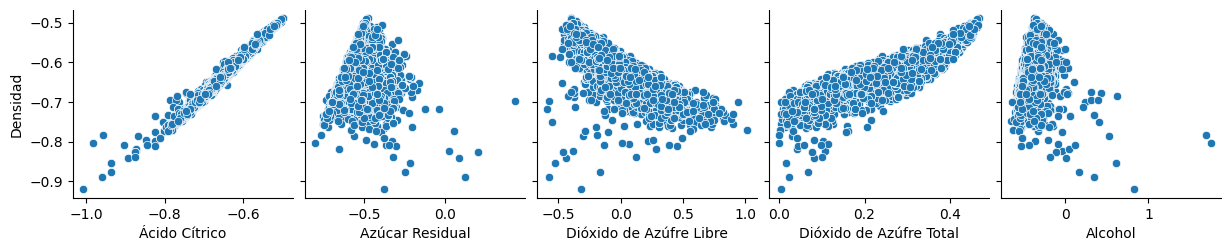

In [62]:
sns.pairplot(df_copy_punto3, x_vars=["Ácido Cítrico", "Azúcar Residual", "Dióxido de Azúfre Libre", "Dióxido de Azúfre Total", "Alcohol"], y_vars=["Densidad"], kind='scatter')
plt.show()


In [63]:
y_df_copy_punto3 = df_copy_punto3["Densidad"]
X_df_copy_punto3 = df_copy_punto3.drop(['Densidad'], axis=1)

X_train_copy_punto3, X_test_copy_punto3, y_train_copy_punto3, y_test_copy_punto3 = train_test_split(X_df_copy_punto3, y_df_copy_punto3, test_size=0.2, random_state=42)


In [64]:

X_train_copy_punto3_design = sms.add_constant(X_train_copy_punto3)
model_punto3_Robust = sms.RLM(y_train_copy_punto3, X_train_copy_punto3_design)
model_punto3_Robust = model_punto3_Robust.fit()
model_punto3_Robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Densidad   No. Observations:                 3918
Model:                            RLM   Df Residuals:                     3912
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 16 Oct 2023                                         
Time:                        00:27:54                                         
No. Iterations:                    32                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0528      0.004    -13.940      0.000      -0.060      -0.045
Ácido Cítrico               0.8892      0.004    238.326      0.000       0.882       0.897
Azúcar Residual            -0.0159      0.002     -9.836      0.000      -0.019      -0.013
Dióxido de Azúfre Libre    -0.0123      0.001     -8.692      0.000      -0.015      -0.010
Dióxido de Azúfre Total     0.0124      0.002      7.337      0.000       0.009       0.016
Alcohol                     0.0349      0.002     23.180      0.000       0.032       0.038
===========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

En el modelo de regresión lineal Robusto, se observa que los coeficientes betas son todos significativos (p-value <0.005), observandose que la variable que más contribuye a la explicación de Y es acido citrico.

y = -0.0528 + 0.8892*Acido citrico -0.0159*Azucar residual - 0.0123*Dióxido de Azúfre Libre + 0.0124*Dioxido de azufre total + 0.0349*Alcohol.



#PUNTO 4

Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión.

##Punto 4.1

El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables que
representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades)
de un producto en un mercado específico: - TV: Gasto en publicidad en televisión. - Radio:
Gasto en publicidad en radio. - Newspaper: Gasto en publicidad en periódicos. - Sales:
Número de unidades vendidas (en miles)

In [65]:
df_punto4 = pd.read_csv('/content/Examen_AC/publicidad.csv')
df_punto4

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [66]:
df_punto4 = df_punto4[["TV", "Radio", "Newspaper", "Sales"]]
df_punto4

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [67]:
df_punto4.shape

(200, 4)

In [68]:
df_punto4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [69]:
df_punto4.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

## Punto 4.2

Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Sales', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Sales', ylabel='Radio'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Sales', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Sales'>,
        <Axes: xlabel='Radio', ylabel='Sales'>,
        <Axes: xlabel='Newspaper', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

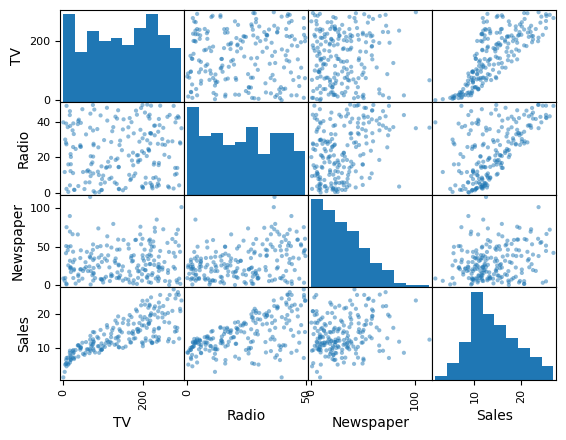

In [70]:
pd.plotting.scatter_matrix(df_punto4)

Se observa que la relación entre las ventas y TV es cercana a una relación lineal. Entre las ventas y la radio, la relación trata de acercarse a la lineal, sin embargo se observan valores atipicos. Entre Newspaper y las ventas, no se observa linealidad en la relación

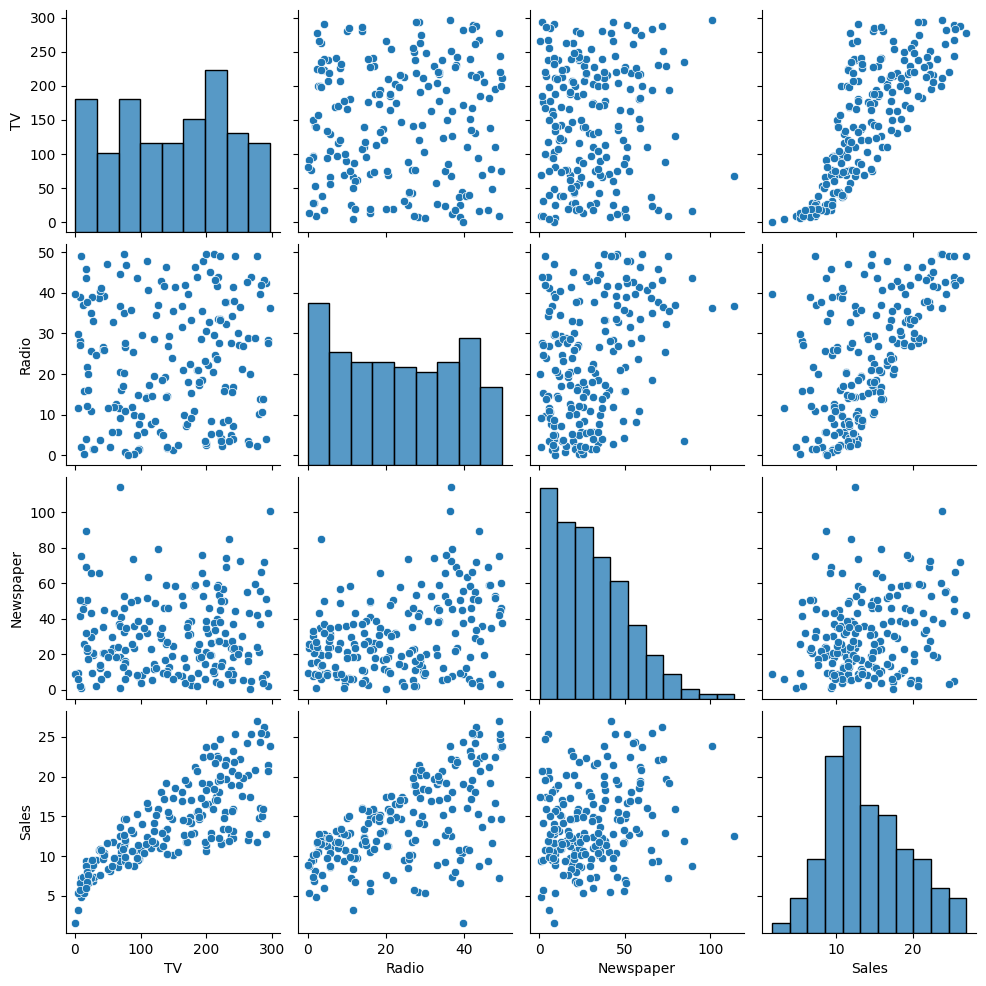

In [71]:
sns.pairplot(df_punto4)

## Punto 4.3
Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

<Axes: >

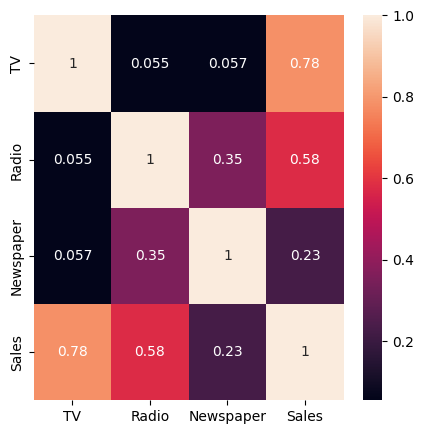

In [72]:
plt.figure(figsize = (5, 5))
sns.heatmap(df_punto4.corr("pearson"), annot = True)

<Axes: >

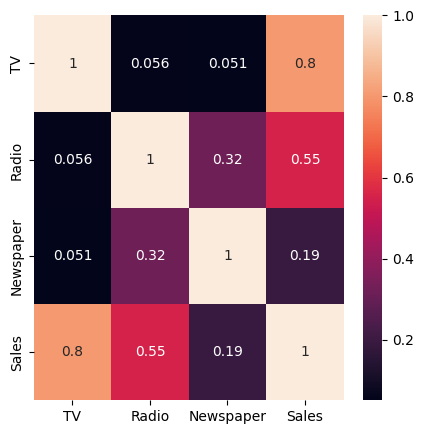

In [73]:
plt.figure(figsize = (5, 5))
sns.heatmap(df_punto4.corr("spearman"), annot = True)

<Axes: >

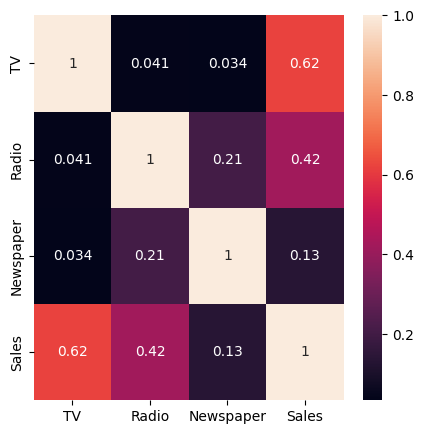

In [74]:
plt.figure(figsize = (5, 5))
sns.heatmap(df_punto4.corr("kendall"), annot = True)

Se observa que la relación entre las ventas con TV, es más fuerte al estimarse con correlación de Spearman, seguido de la correlación de Pearson, ambas muy similares, mientras que Kendall, subestima esta relación.

Respecto a la relación entre ventas y radio se observa también muy baja al explorarse con el coeficiente de correlación de kendall. Aunque Pearson y Spearman dan valores más altos, no llegan a 0.6.

Finalmente, la relación más baja observada fue entre ventas y Newspaper, la cual estuvo por debajo de 0.2 para kendall y spearman, y fue de 0.23 para Pearson.

Lo anterior, muestra que la variable ventas, unicamente correlaciona fuerte con la variable TV, y que esta relación, al no ser completamente lineal, puede estar siendo mejor estimada con correlación de Spearman.

## Punto 4.4

Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?

In [75]:
punto4_X = df_punto4[["TV"]]
punto4_y = df_punto4[["Sales"]]

In [76]:
X_input_punto4 = sms.add_constant(punto4_X) ### Agregando el vector de unos para crear la matriz de diseño
model_punto4 = sms.OLS(punto4_y, X_input_punto4) ### Creando el modelo de regresion lineal simple (OLS)
result_punto4 = model_punto4.fit()
result_punto4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.47e-42
Time:                        00:28:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Prob (F-statistic) < 0.05 Rechazo H0 y concluyo que hay significancia estadistica.
# R-squared es 0.612, lo que indica que el modelo de regresión lineal es explicado por la variable independiente TV en un 61,2 %
# P>|t| < 0.05 para B0 y B1, por lo tanto el coeficiente asociado es significativo

#Ecuación de la recta
y_ajustado = 7.0326 + 0.0475*punto4_X

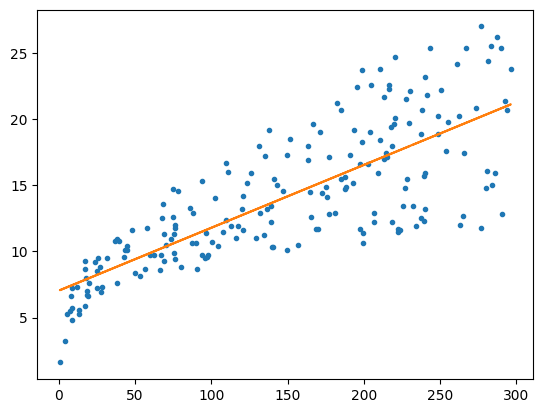

In [78]:
plt.plot(punto4_X, punto4_y, '.')
plt.plot(punto4_X, y_ajustado)

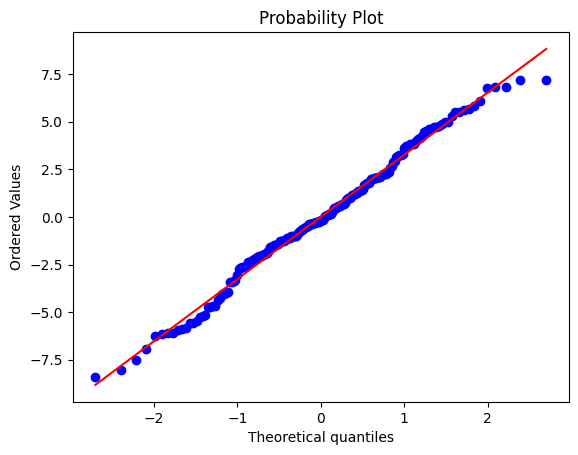

In [79]:
#Normalidad en los residuales
stats.probplot(result_punto4.resid, dist="norm", plot=pylab)
pylab.show()

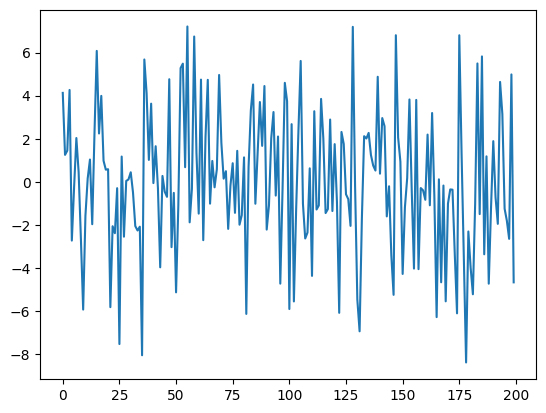

In [80]:
#Media cero y homocedasticidad (varianza constante) en los residuales
plt.plot(result_punto4.resid)

El valor del coeficiente de determinación es R^2 = 0.612
es decir que el modelo es capaz de explicar y predecir en gran medida la variacion de la variable

## Punto 4.5

Realiza una predicción del retorno de inversión esperado cuando se realizan 5 anuncios por el canal de la variable escogida en el ítem anterior. ¿Cuál es el intervalo de confianza del 95% para la predicción?

In [81]:
#Predicción del retorno de inversión esperado cuando se realizan 5 anuncios por el canal de la variable escogida en el ítem anterior

y_ajustado_5_anuncios = 7.0326 + 0.0475*5
y_ajustado_5_anuncios

7.2701

In [82]:
# Define el nivel de confianza deseado (en este caso del 95%)
nivel_confianza = 0.95

# Valor de x al que se le quiere definir el intervalo de confianza
nuevo_valor_x = 5

# Calcula la predicción y los intervalos de confianza
prediccion = result_punto4.get_prediction(exog=[1, nuevo_valor_x]).conf_int(alpha=1 - nivel_confianza)

print("Intervalos de confianza del 95% para X = 5:", prediccion)

Intervalos de confianza del 95% para X = 5: [[6.3902261  8.15032741]]


#Punto 5

Se desea predecir la resistencia a la compresión del concreto (Concrete compressive strength) en función de diferentes variables predictoras como el cemento (Cement), la escoria (Slag), la ceniza volante (Fly ash), el agua (Water), el superplastificante (Superplasticizer), el agregado grueso (Coarse aggregate) y el agregado fino (Fine aggregate). Para ello se dispone de un conjunto de datos con 1030 observaciones. Se desea construir un modelo de regresión lineal múltiple para predecir la resistencia a la compresión del concreto en función de las variables predictoras.

##Punto 5.1
Cargar los datos del archivo “Concrete_Data.xls” y examinar las características del conjunto de datos.

In [83]:
df_punto5 = pd.read_excel('/content/Examen_AC/Concrete_Data.xls')
nombres_nuevos = {
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly ash',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate',
    'Age (day)': 'Age',
    'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength',
}

df_punto5 = df_punto5.rename(columns=nombres_nuevos)
df_punto5

Cement   Slag  Fly ash  Water  Superplasticizer  Coarse aggregate  \
0      540.0    0.0      0.0  162.0               2.5            1040.0   
1      540.0    0.0      0.0  162.0               2.5            1055.0   
2      332.5  142.5      0.0  228.0               0.0             932.0   
3      332.5  142.5      0.0  228.0               0.0             932.0   
4      198.6  132.4      0.0  192.0               0.0             978.4   
...      ...    ...      ...    ...               ...               ...   
1025   276.4  116.0     90.3  179.6               8.9             870.1   
1026   322.2    0.0    115.6  196.0              10.4             817.9   
1027   148.5  139.4    108.6  192.7               6.1             892.4   
1028   159.1  186.7      0.0  175.6              11.3             989.6   
1029   260.9  100.5     78.3  200.6               8.6             864.5   

      Fine Aggregate  Age  Concrete compressive strength  
0              676.0   28                      79.986111  
1              676.0   28                      61.887366  
2              594.0  270                      40.269535  
3              594.0  365                      41.052780  
4              825.5  360                      44.296075  
...              ...  ...                            ...  
1025           768.3   28                      44.284354  
1026           813.4   28                      31.178794  
1027           780.0   28                      23.696601  
1028           788.9   28                      32.768036  
1029           761.5   28                      32.401235  

[1030 rows x 9 columns]

In [84]:
ceros_por_columna = (df_punto5 == 0).sum()
ceros_por_columna

Cement                             0
Slag                             466
Fly ash                          566
Water                              0
Superplasticizer                 379
Coarse aggregate                   0
Fine Aggregate                     0
Age                                0
Concrete compressive strength      0
dtype: int64

In [85]:
df_punto5.shape

(1030, 9)

In [86]:
df_punto5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Slag                           1030 non-null   float64
 2   Fly ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [87]:
df_punto5.describe()

Cement         Slag      Fly ash        Water  Superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.165631    73.895485    54.187136   181.566359          6.203112   
std     104.507142    86.279104    63.996469    21.355567          5.973492   
min     102.000000     0.000000     0.000000   121.750000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.350000   
75%     350.000000   142.950000   118.270000   192.000000         10.160000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       Coarse aggregate  Fine Aggregate          Age  \
count       1030.000000     1030.000000  1030.000000   
mean         972.918592      773.578883    45.662136   
std           77.753818       80.175427    63.169912   
min          801.000000      594.000000     1.000000   
25%          932.000000      730.950000     7.000000   
50%          968.000000      779.510000    28.000000   
75%         1029.400000      824.000000    56.000000   
max         1145.000000      992.600000   365.000000   

       Concrete compressive strength  
count                    1030.000000  
mean                       35.817836  
std                        16.705679  
min                         2.331808  
25%                        23.707115  
50%                        34.442774  
75%                        46.136287  
max                        82.599225

##Punto 5.2
Realizar un análisis exploratorio de los datos para entender la relación entre las variables predictoras y la variable respuesta.

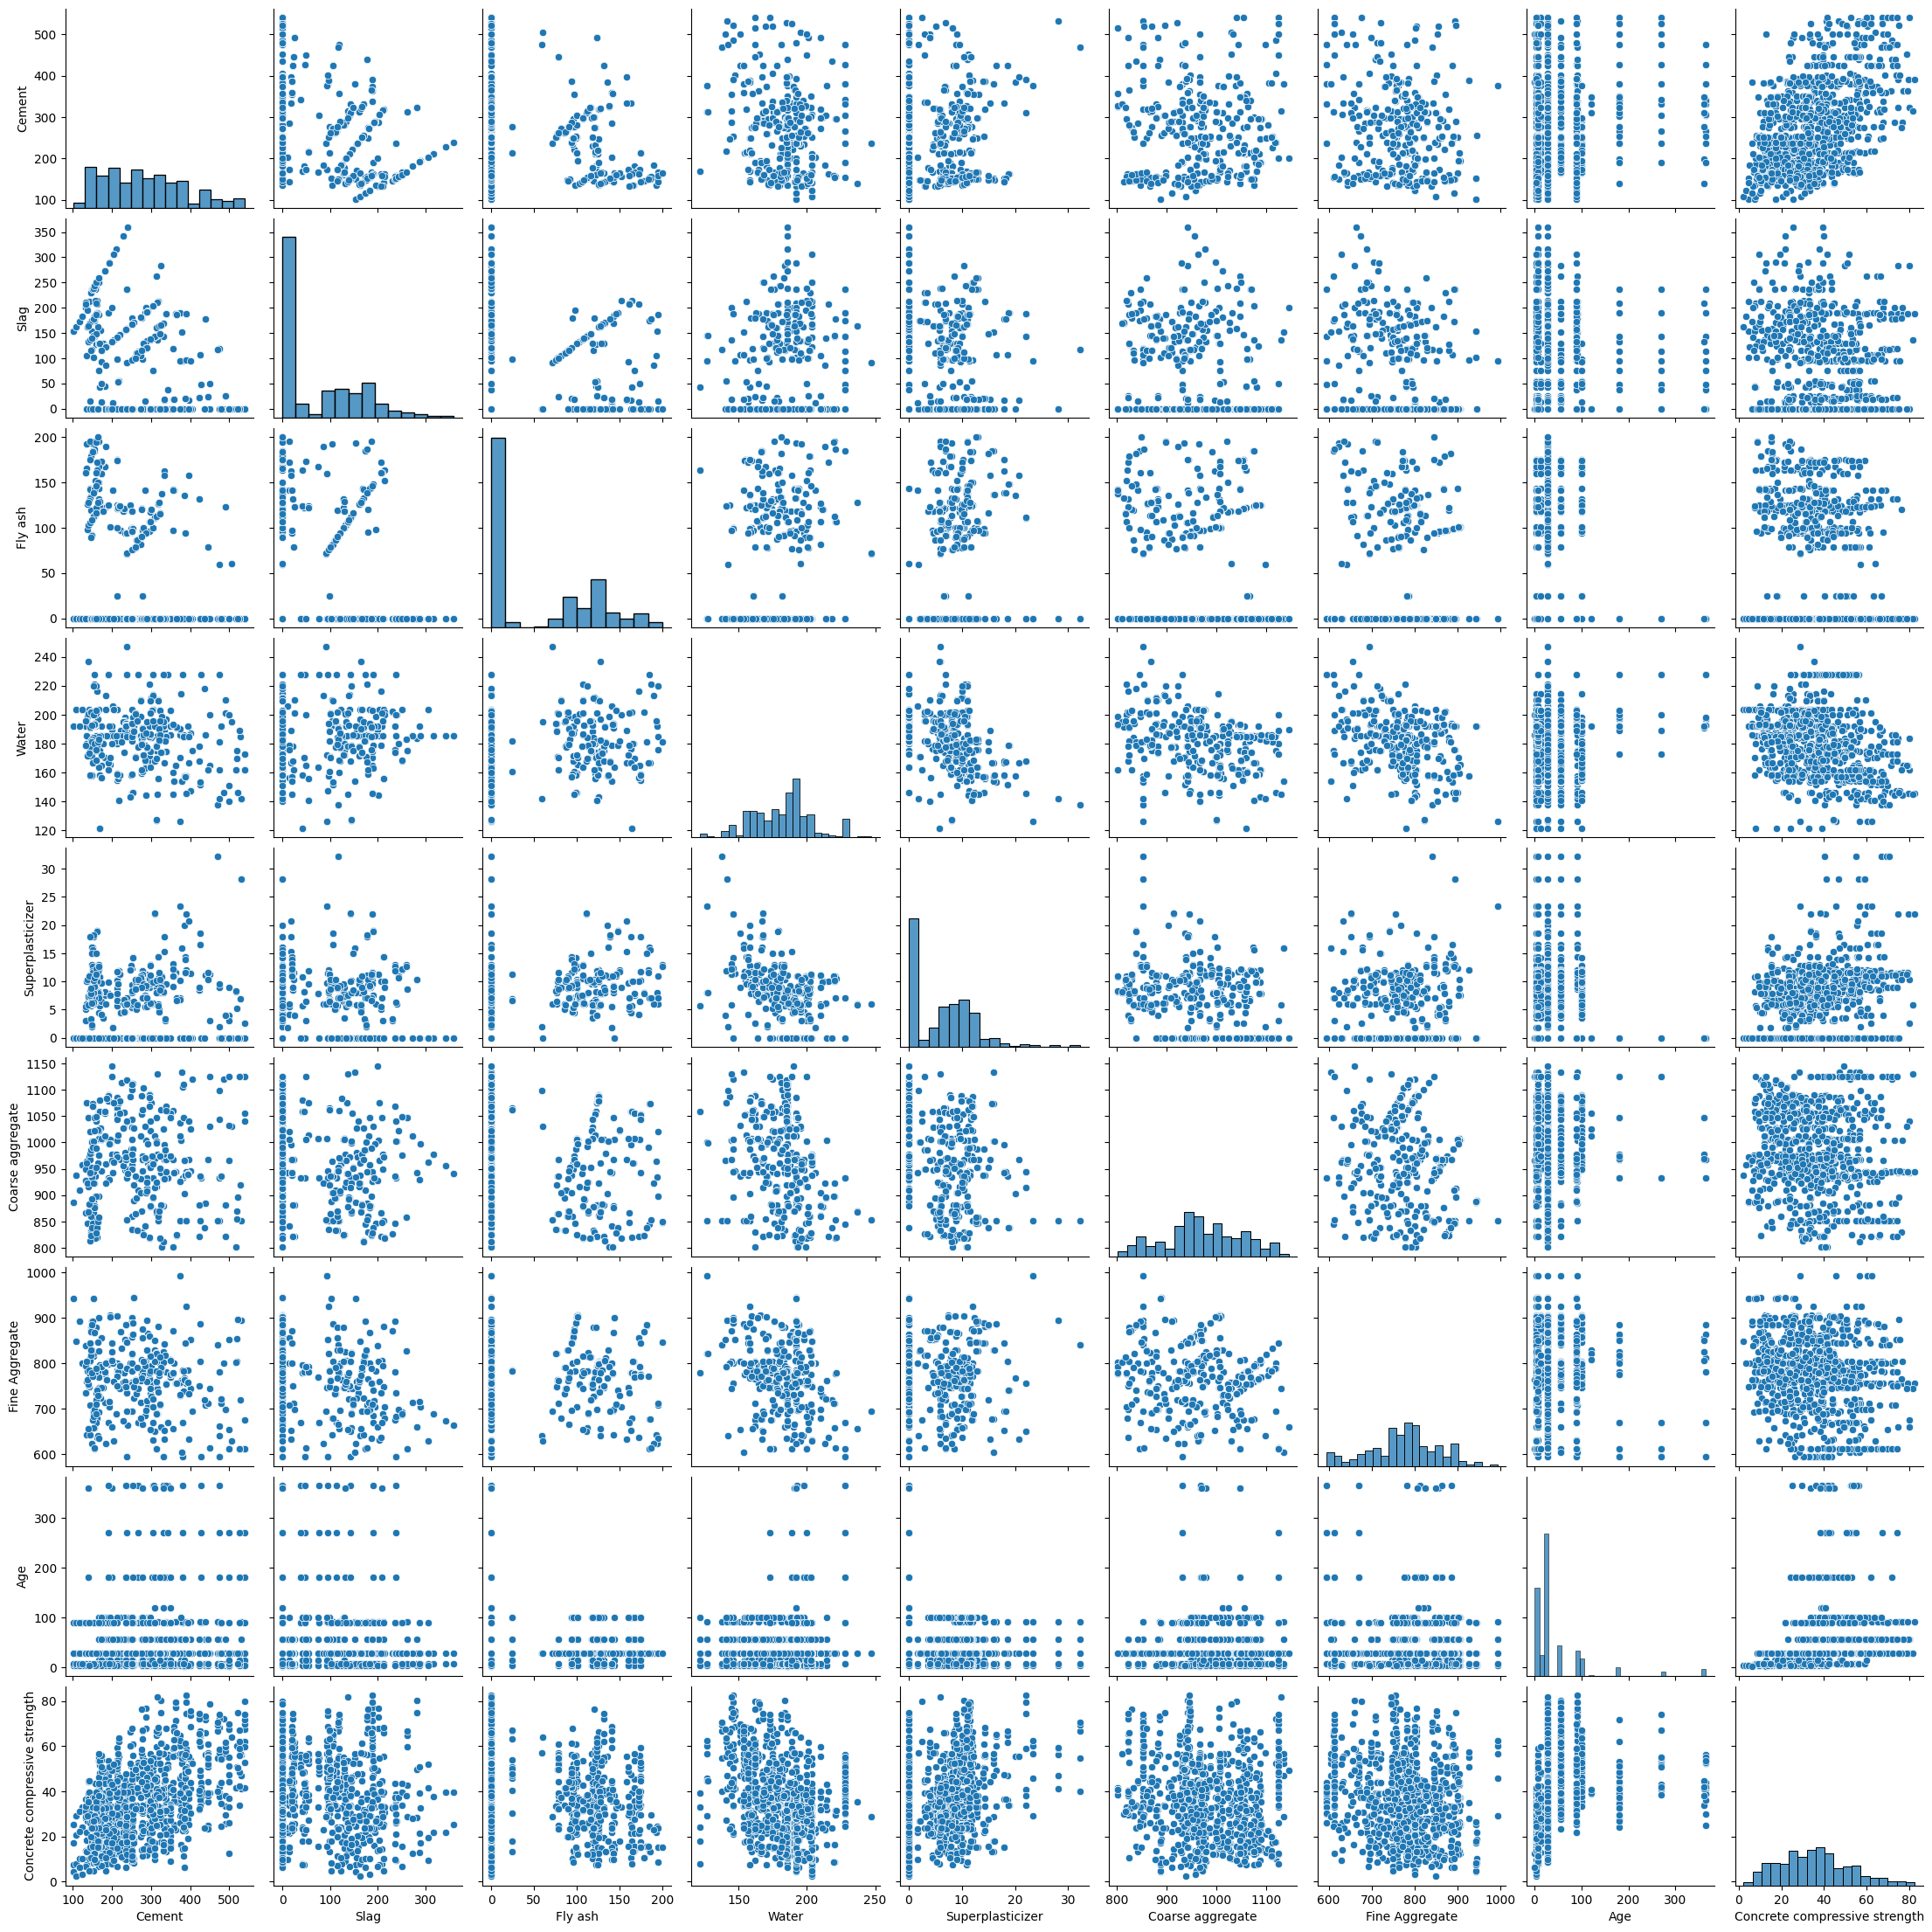

In [88]:
sns.pairplot(df_punto5)

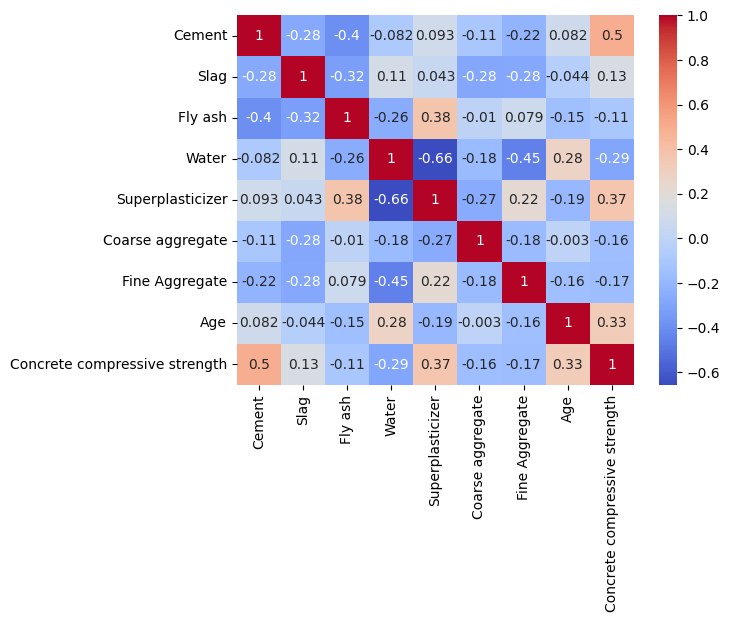

In [89]:
# Calcular el coeficiente de correlación
correlation_matrix = df_punto5.corr('pearson')
# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

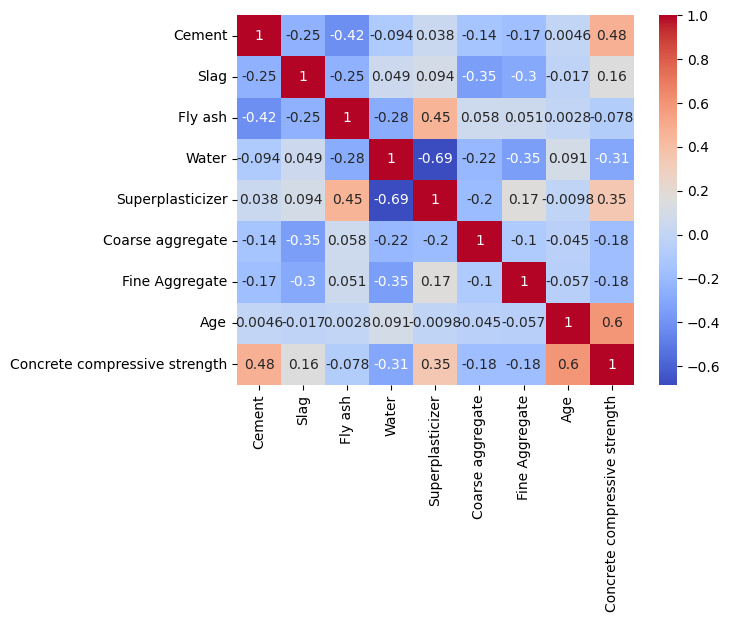

In [90]:
# Calcular el coeficiente de correlación
correlation_matrix = df_punto5.corr('spearman')
# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

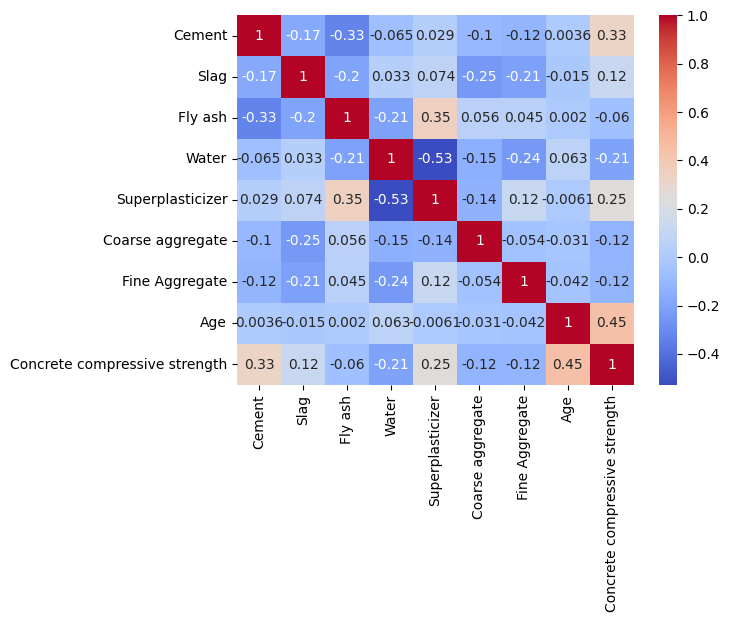

In [91]:
# Calcular el coeficiente de correlación
correlation_matrix = df_punto5.corr('kendall')
# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

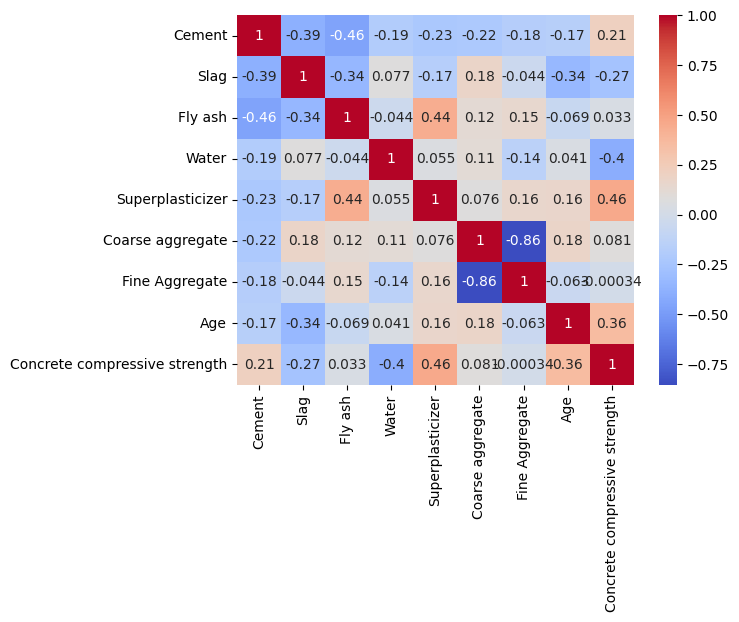

In [92]:
df_punto5_estandarizado = stats.zscore(df_punto5, axis=1)

# Calcular el coeficiente de correlación
correlation_matrix = df_punto5_estandarizado.corr('spearman')
# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Se estandariza el conjunto de datos para ver si hay mejoría en las correlaciones, pero no es el caso, por lo que se decide continuar con el dataset original

In [93]:
df_punto5.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'Superplasticizer',
       'Coarse aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

##Punto 5.3
Entrenar un modelo de regresión lineal múltiple utilizando el conjunto de datos y evalue si hay significancia en el modelo.

In [94]:
punto5_X = df_punto5.drop(["Concrete compressive strength"], axis = 1)
punto5_y = df_punto5[["Concrete compressive strength"]]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(punto5_X, punto5_y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 95.97548435337708
R^2: 0.627541605542902


In [97]:
intercepto = model.intercept_
coeficientes = model.coef_

print(intercepto)
print(coeficientes)

[-28.63573936]
[[ 0.11897516  0.10851781  0.08216854 -0.13571192  0.30873202  0.01780436
   0.02406104  0.11644448]]


El modelo de regresión lineal es el siguiente

Concrete compressive strength = -28.636 + 0.1189*Cement + 0.1085*Slag + 0.082*Fly ash - 0.135*Water + 0.3087*Superplasticizer + 0.0178*Coarse aggregate + 0.0240*Fine aggregate + 0.1164*Age

El modelo tiene un error absoluto de 0.95 y un coeficiente de determinación que indica que el 63% de la variabilidad de Concrete compressive strength es explicada por las variables independientes incluidas en el modelo.


##Punto 5.4
Analizar la significancia estadística de las variables predictoras y construir un modelo de regresión lineal múltiple reducido con las variables significativas. Revise su desempeño con respecto al modelo completo revisando el Adj - R2 y los criterios de información de Akaike y de Bayes (AIC y BIC).

In [98]:
X_input_punto5 = sms.add_constant(X_train) ### Agregando el vector de unos para crear la matriz de diseño
model_punto5 = sms.OLS(y_train, X_input_punto5) ### Creando el modelo de regresion lineal simple (OLS)
result_punto5 = model_punto5.fit()
result_punto5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.610
Model:                                       OLS   Adj. R-squared:                  0.607
Method:                            Least Squares   F-statistic:                     159.7
Date:                           Mon, 16 Oct 2023   Prob (F-statistic):          3.70e-161
Time:                                   00:28:44   Log-Likelihood:                -3108.3
No. Observations:                            824   AIC:                             6235.
Df Residuals:                                815   BIC:                             6277.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -28.6357     29.333     -0.976      0.329     -86.212      28.941
Cement               0.1190      0.009     12.680      0.000       0.101       0.137
Slag                 0.1085      0.011      9.588      0.000       0.086       0.131
Fly ash              0.0822      0.014      5.809      0.000       0.054       0.110
Water               -0.1357      0.044     -3.076      0.002      -0.222      -0.049
Superplasticizer     0.3087      0.104      2.959      0.003       0.104       0.514
Coarse aggregate     0.0178      0.010      1.712      0.087      -0.003       0.038
Fine Aggregate       0.0241      0.012      2.031      0.043       0.001       0.047
Age                  0.1164      0.006     18.120      0.000       0.104       0.129
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.149
Skew:                          -0.168   Prob(JB):                        0.126
Kurtosis:                       3.090   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El Prob (F-statistic) < 0.05 por lo que hay significancia en el modelo lineal.
El número de condición es muy grande, por lo que tenemos problema de multicolinealidad, es decir, dentro de las variables explicativas hay alta correlación


In [99]:
#Se empieza a sacar del modelo las variables cuyo P>|t| > 0.05, es decir, las que no son significativas para el modelo
X_train_reducido = X_train.drop(["Coarse aggregate"], axis = 1)

#punto5_X_reducido = df_punto5_reducido.drop(["Concrete compressive strength"], axis = 1)
#punto5_y_reducido = df_punto5_reducido[["Concrete compressive strength"]]

X_input_punto5_reducido = sms.add_constant(X_train_reducido) ### Agregando el vector de unos para crear la matriz de diseño
model_punto5_reducido = sms.OLS(y_train, X_input_punto5_reducido) ### Creando el modelo de regresion lineal simple (OLS)
result_punto5_reducido = model_punto5_reducido.fit()
result_punto5_reducido.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.609
Model:                                       OLS   Adj. R-squared:                  0.606
Method:                            Least Squares   F-statistic:                     181.6
Date:                           Mon, 16 Oct 2023   Prob (F-statistic):          1.14e-161
Time:                                   00:28:44   Log-Likelihood:                -3109.8
No. Observations:                            824   AIC:                             6236.
Df Residuals:                                816   BIC:                             6273.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               18.7978      9.664      1.945      0.052      -0.171      37.767
Cement               0.1066      0.006     17.844      0.000       0.095       0.118
Slag                 0.0932      0.007     13.460      0.000       0.080       0.107
Fly ash              0.0655      0.010      6.364      0.000       0.045       0.086
Water               -0.1970      0.026     -7.630      0.000      -0.248      -0.146
Superplasticizer     0.2472      0.098      2.521      0.012       0.055       0.440
Fine Aggregate       0.0072      0.007      1.091      0.276      -0.006       0.020
Age                  0.1158      0.006     18.030      0.000       0.103       0.128
==============================================================================
Omnibus:                        4.132   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                4.003
Skew:                          -0.167   Prob(JB):                        0.135
Kurtosis:                       3.073   Cond. No.                     2.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
X_train_reducido_mas = X_train_reducido.drop(["Fine Aggregate"], axis = 1)

#punto5_X_reducido_mas = df_punto5_reducido_mas.drop(["Concrete compressive strength"], axis = 1)
#punto5_y_reducido_mas = df_punto5_reducido_mas[["Concrete compressive strength"]]

X_input_punto5_reducido_mas = sms.add_constant(X_train_reducido_mas) ### Agregando el vector de unos para crear la matriz de diseño
model_punto5_reducido_mas = sms.OLS(y_train, X_input_punto5_reducido_mas) ### Creando el modelo de regresion lineal simple (OLS)
result_punto5_reducido_mas = model_punto5_reducido_mas.fit()
result_punto5_reducido_mas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.608
Model:                                       OLS   Adj. R-squared:                  0.606
Method:                            Least Squares   F-statistic:                     211.6
Date:                           Mon, 16 Oct 2023   Prob (F-statistic):          1.35e-162
Time:                                   00:28:44   Log-Likelihood:                -3110.4
No. Observations:                            824   AIC:                             6235.
Df Residuals:                                817   BIC:                             6268.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               27.9537      4.793      5.832      0.000      18.546      37.362
Cement               0.1026      0.005     21.574      0.000       0.093       0.112
Slag                 0.0888      0.006     15.688      0.000       0.078       0.100
Fly ash              0.0597      0.009      6.777      0.000       0.042       0.077
Water               -0.2079      0.024     -8.727      0.000      -0.255      -0.161
Superplasticizer     0.2739      0.095      2.885      0.004       0.088       0.460
Age                  0.1153      0.006     17.998      0.000       0.103       0.128
==============================================================================
Omnibus:                        4.274   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.188
Skew:                          -0.174   Prob(JB):                        0.123
Kurtosis:                       3.039   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se observa que al eliminar las variables no significativas el AIC se mantiene igual con respecto al modelo con todas las variables, pero el BIC si se reduce. Por otro lado, el Adj. R-squared pasa de ser 0.607 en el modelo con todas las variables a 0.606, disminuye muy poco por lo que con el modelo ajustado, el modelo de regresión lineal es explicado por las variables independientes en un 60,6%

##Punto 5.5
Valide los supuestos del modelo y en caso de no cumplir alguno, proponga una solución. Evalúe la conveniencia de usar un enfoque robusto en este caso.

Se cumple el supuesto de independencia en los errores ya que la prueba de Durbin Watson dió 1.931

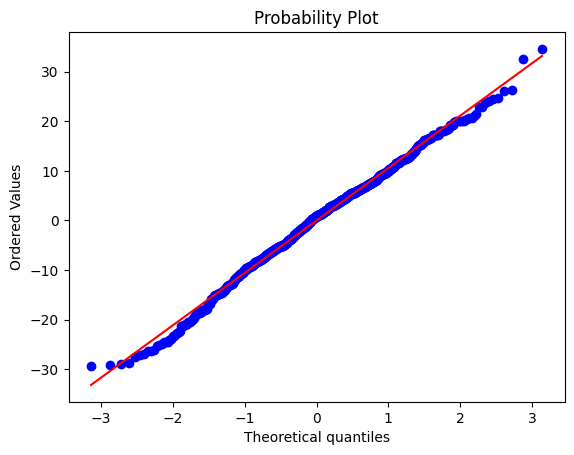

In [101]:
#Normalidad en los residuales
stats.probplot(result_punto5_reducido_mas.resid, dist="norm", plot=pylab)
pylab.show()

También se cumple el supuesto de normalidad, dado que Prob(JB) dió mayor a 0.05, por lo que no hay evidencia suficiente para rechazar H0

In [102]:
het_breuschpagan(result_punto5_reducido_mas.resid, result_punto5_reducido_mas.model.exog)

(115.56691251474172,
 1.3885761623791787e-22,
 22.212911186786037,
 2.6433740737370876e-24)

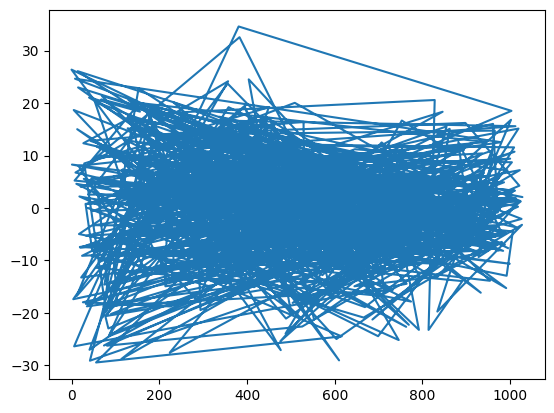

In [103]:
plt.plot(result_punto5_reducido_mas.resid)

Se observa que el supuesto de homocedasticidad no se cumple

Se realizaron tres modelos lineales. En el primero se incluyeron todas las variables independientes. Dicho modelo fue significativo y se cumplió el supuesto de normalidad de los residuales, también se cumplió el supuesto de independencia en los errores. En el segundo modelo se eliminó la variable con el coeficiente menos significativo, el modelo ahora arrojó que hay otra variable no significativa en el modelo (Fine Aggregate), la cual se procede a eliminar también del modelo. De acuerdo con AIC y BIC, el mejor modelo fue el tercero, en el que se eliminaron las dos variables con menor significancia estadística. En el modelo final, con las dos variables eliminadas, se cumplen todos los supuestos en los residuales menos el de homocedasticidad.

Se concluye entonces, que las variables con las que se cuenta, no son adecuadas para explicar linealmente el comportamiento de Y

Se recomienda utilizar un modelo de regresión robusto por los siguientes escenarios presentados en nuestros datos:

1. Presencia de valores atípicos
2. Heterocedasticidad
3. Presencia de multicolinealidad

In [104]:
result_punto5_reducido_mas_ridge = model_punto5.fit_regularized(alpha = 0.5, L1_wt=0)
result_punto5_reducido_mas_ridge.params

array([-0.0088637 ,  0.11129248,  0.09933075,  0.07193829, -0.17571565,
        0.26669284,  0.00817718,  0.01331338,  0.11608722])

In [105]:
data_punto5_X = X_train_reducido_mas.values
data_punto5_y = y_train.values

In [106]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=47)

model_ridge = RidgeCV(alphas=np.arange(9560,9580,0.1), cv = cv, scoring="neg_mean_absolute_error")

model_ridge.fit(data_punto5_X, data_punto5_y)

RidgeCV(alphas=array([9560. , 9560.1, 9560.2, 9560.3, 9560.4, 9560.5, 9560.6, 9560.7,
       9560.8, 9560.9, 9561. , 9561.1, 9561.2, 9561.3, 9561.4, 9561.5,
       9561.6, 9561.7, 9561.8, 9561.9, 9562. , 9562.1, 9562.2, 9562.3,
       9562.4, 9562.5, 9562.6, 9562.7, 9562.8, 9562.9, 9563. , 9563.1,
       9563.2, 9563.3, 9563.4, 9563.5, 9563.6, 9563.7, 9563.8, 9563.9,
       9564. , 9564.1, 9564.2, 9564.3, 9564.4, 9564.5, 9564.6, 9564...
       9576. , 9576.1, 9576.2, 9576.3, 9576.4, 9576.5, 9576.6, 9576.7,
       9576.8, 9576.9, 9577. , 9577.1, 9577.2, 9577.3, 9577.4, 9577.5,
       9577.6, 9577.7, 9577.8, 9577.9, 9578. , 9578.1, 9578.2, 9578.3,
       9578.4, 9578.5, 9578.6, 9578.7, 9578.8, 9578.9, 9579. , 9579.1,
       9579.2, 9579.3, 9579.4, 9579.5, 9579.6, 9579.7, 9579.8, 9579.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=47),
        scoring='neg_mean_absolute_error')

In [107]:
model_ridge.alpha_

9570.80000000004

In [108]:
model_ridge.coef_

array([[ 0.10450289,  0.09100563,  0.06436517, -0.2170061 ,  0.17244247,
         0.11454642]])

In [109]:
model_ridge_mejor_alpha = Ridge(alpha = 9571)

scores = cross_val_score(model_ridge_mejor_alpha, data_punto5_X, data_punto5_y, cv = cv, scoring="neg_mean_absolute_error")

MAE = np.mean(-1*scores)
print(MAE)

8.489954074033655


In [110]:
model_ridge_mejor_alpha_fit = model_ridge_mejor_alpha.fit(data_punto5_X, data_punto5_y)

In [111]:
model_ridge_mejor_alpha_fit.coef_

array([[ 0.10450291,  0.09100565,  0.06436522, -0.21700614,  0.17244128,
         0.1145464 ]])

In [112]:
model_ridge_mejor_alpha_fit.intercept_

array([29.32861271])

In [113]:
X_test_ridge = X_test.drop(["Coarse aggregate"], axis = 1)
X_test_ridge = X_test_ridge.drop(["Fine Aggregate"], axis = 1)

In [114]:
y_pred_ridge = model_ridge_mejor_alpha_fit.predict(X_test_ridge)

# Calcula el error cuadrático medio (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calcula el coeficiente de determinación (R^2)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'MSE: {mse_ridge}')
print(f'R^2: {r2_ridge}')

MSE: 95.46440538807776
R^2: 0.6295249834038076


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Al aplicar Ridge sobre el modelo de regresión multiple reducido con las variables significativas se observa que el MSE se reduce y el R^2 aumenta, aunque no de manera significativa

Se decide aplicar el modelo lasso para verificar si penalizando variables nos mejora el problema de multicolinealidad y de homocedasticidad

In [115]:
#Aplicar lasso para penalizar variables
model_lasso = LassoCV(alphas=np.arange(0.01,2,0.5), cv = cv)
model_lasso.fit(data_punto5_X, data_punto5_y)
print(model_lasso.alpha_)

0.51


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
model_lasso_mejor_alpha = Lasso(alpha = 0.51)

model_lasso_mejor_alpha_fit = model_lasso_mejor_alpha.fit(data_punto5_X, data_punto5_y)

In [117]:
model_lasso_mejor_alpha_fit.coef_

array([ 0.10298978,  0.08925049,  0.06064221, -0.21061392,  0.24840861,
        0.11504982])

Dado que con el alpha que recomienda lasso no se penaliza ninguna variable, se va a incrementar el valor de alpha para determinar cual es la primera variable de deberiamos eliminar de nuestro modelo

In [118]:
model_lasso_alpha_aumentado = Lasso(alpha = 10)

model_lasso_alpha_aumentado_fit = model_lasso_alpha_aumentado.fit(data_punto5_X, data_punto5_y)

model_lasso_alpha_aumentado_fit.coef_

array([ 0.1054676 ,  0.09161992,  0.06750693, -0.22651804,  0.        ,
        0.11037849])

In [119]:
X_train_reducido_mas_lasso = X_train_reducido.drop(["Fine Aggregate", "Superplasticizer"], axis = 1)

#punto5_X_reducido_mas = df_punto5_reducido_mas.drop(["Concrete compressive strength"], axis = 1)
#punto5_y_reducido_mas = df_punto5_reducido_mas[["Concrete compressive strength"]]

X_input_punto5_reducido_mas_lasso = sms.add_constant(X_train_reducido_mas_lasso) ### Agregando el vector de unos para crear la matriz de diseño
model_punto5_reducido_mas_lasso = sms.OLS(y_train, X_input_punto5_reducido_mas_lasso) ### Creando el modelo de regresion lineal simple (OLS)
result_punto5_reducido_mas_lasso = model_punto5_reducido_mas_lasso.fit()
result_punto5_reducido_mas_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.604
Model:                                       OLS   Adj. R-squared:                  0.602
Method:                            Least Squares   F-statistic:                     250.1
Date:                           Mon, 16 Oct 2023   Prob (F-statistic):          5.03e-162
Time:                                   00:28:56   Log-Likelihood:                -3114.5
No. Observations:                            824   AIC:                             6241.
Df Residuals:                                818   BIC:                             6269.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6428      4.213      8.222      0.000      26.372      42.913
Cement         0.1077      0.004     24.253      0.000       0.099       0.116
Slag           0.0955      0.005     18.423      0.000       0.085       0.106
Fly ash        0.0721      0.008      9.313      0.000       0.057       0.087
Water         -0.2498      0.019    -13.176      0.000      -0.287      -0.213
Age            0.1159      0.006     18.029      0.000       0.103       0.129
==============================================================================
Omnibus:                        6.196   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.120
Skew:                          -0.209   Prob(JB):                       0.0469
Kurtosis:                       3.057   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
model_lasso_alpha_aumentado_mas = Lasso(alpha = 110)

model_lasso_alpha_aumentado_mas_fit = model_lasso_alpha_aumentado_mas.fit(data_punto5_X, data_punto5_y)

model_lasso_alpha_aumentado_mas_fit.coef_

array([ 0.08287663,  0.05241381,  0.02123024, -0.        ,  0.        ,
        0.05552601])

In [121]:
X_train_reducido_mas_lasso_final = X_train_reducido.drop(["Fine Aggregate", "Superplasticizer", "Water"], axis = 1)

#punto5_X_reducido_mas = df_punto5_reducido_mas.drop(["Concrete compressive strength"], axis = 1)
#punto5_y_reducido_mas = df_punto5_reducido_mas[["Concrete compressive strength"]]

X_input_punto5_reducido_mas_lasso_final = sms.add_constant(X_train_reducido_mas_lasso_final) ### Agregando el vector de unos para crear la matriz de diseño
model_punto5_reducido_mas_lasso_final = sms.OLS(y_train, X_input_punto5_reducido_mas_lasso_final) ### Creando el modelo de regresion lineal simple (OLS)
result_punto5_reducido_mas_lasso_final = model_punto5_reducido_mas_lasso_final.fit()
result_punto5_reducido_mas_lasso_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.521
Model:                                       OLS   Adj. R-squared:                  0.518
Method:                            Least Squares   F-statistic:                     222.3
Date:                           Mon, 16 Oct 2023   Prob (F-statistic):          3.90e-129
Time:                                   00:28:56   Log-Likelihood:                -3193.8
No. Observations:                            824   AIC:                             6398.
Df Residuals:                                819   BIC:                             6421.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.5689      1.978     -7.872      0.000     -19.451     -11.687
Cement         0.1210      0.005     25.428      0.000       0.112       0.130
Slag           0.1007      0.006     17.706      0.000       0.090       0.112
Fly ash        0.1010      0.008     12.367      0.000       0.085       0.117
Age            0.0958      0.007     13.945      0.000       0.082       0.109
==============================================================================
Omnibus:                        1.176   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.041
Skew:                           0.032   Prob(JB):                        0.594
Kurtosis:                       3.162   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
het_breuschpagan(result_punto5_reducido_mas_lasso_final.resid, result_punto5_reducido_mas_lasso_final.model.exog)

(119.98515783636358,
 5.380603843062373e-25,
 34.89551582676047,
 6.240756717727339e-27)

Dado que aplicando diferentes niveles de penalización con lasso nuestro modelo continua teniendo problema de homocedasticidad y multicolinealidad, concluimos que los datos no se ajustan a un modelo lineal. Además ningún coeficiente al aplicar lasso o ridge se infla demasaido como para decir que esa variable explica muy bien el modelo de manera lineal